# Hogyan tanulják meg az összefüggéseket a gépi tanulási algoritmusok
v3.1

## Adathalmazok készítése

In [1]:
dataset_collection={}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(42)

import string

In [3]:
def adathalmaz_generalo(sorok_szama=10000,oszlopok_szama=2,target_fv=lambda x: x['x']):
    np.random.seed(42)
    min_v=0.0
    max_v=10.0
    df = pd.DataFrame({'x':np.random.uniform(low=min_v, high=max_v, size=sorok_szama)})
    for i in range(1,oszlopok_szama):
        df['extra_'+str(i)]=np.random.uniform(low=min_v, high=max_v, size=sorok_szama)
    df['target']=df.apply(target_fv,axis=1)
    df['target']=df['target'] + np.random.normal(loc=0.0, scale=0.1, size=sorok_szama)
    
    return df 

In [4]:
test=adathalmaz_generalo(6,3,lambda x: x['x']*2)
test

x   extra_1   extra_2     target
0  3.745401  0.580836  8.324426   7.318311
1  9.507143  8.661761  2.123391  18.958057
2  7.319939  6.011150  1.818250  14.538596
3  5.986585  7.080726  1.834045  12.004594
4  1.560186  0.205845  3.042422   3.029570
5  1.559945  9.699099  5.247564   2.978660

In [5]:
dataset_collection={}

dataset_collection['egyenes'] = adathalmaz_generalo(10000,3,lambda x: 0.5*x['x'])

dataset_collection['gorbe'] = adathalmaz_generalo(10000,3,lambda x: (x['x']/3.0)**2)


dataset_collection['egysegugras'] = adathalmaz_generalo(10000,3,lambda x: 0 if x['x']<5 else 10)

dataset_collection['lejto_es_vege']= adathalmaz_generalo(10000,3,lambda x: 0 if x['x']<5 else 3*(x['x']-5))

def f(x):
    if x<3:
        return 0.0
    elif x>7:
        return 2.0
    elif x<5:
        return (x-3)*5
    else:
        return (x-5)*-4+10
dataset_collection['tuske'] = adathalmaz_generalo(10000,3,lambda x: f(x['x']))

dataset_collection['sin'] = adathalmaz_generalo(10000,3,lambda x: np.sin(float(x['x']*2)))

dataset_collection['sinsin'] = adathalmaz_generalo(10000,3,lambda x: np.sin(x['x']*0.1)*np.sin(float(x['x']*2)))




In [6]:
def egydimenziosat_rajzol(indf,title=""):
    plt.scatter(indf['x'],indf['target'],c='blue',s=1,label='target')
    if 'pred' in list(indf.columns):
        plt.scatter(indf['x'],indf['pred'],c='red',s=1,label='pred')
    plt.xlabel("x")
    plt.ylabel("target / predict")
    plt.title(title)
    plt.legend()


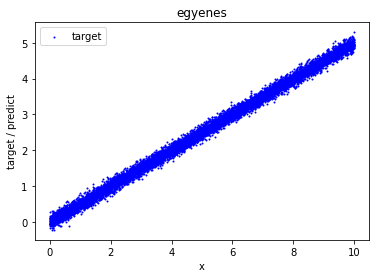

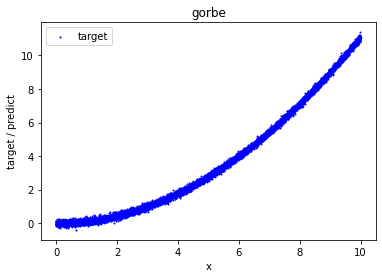

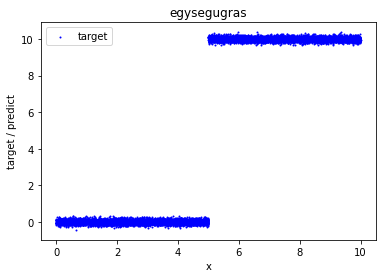

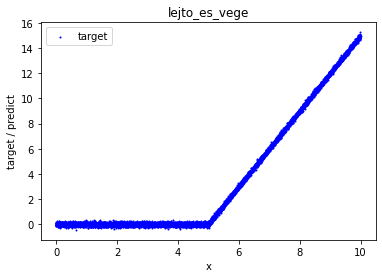

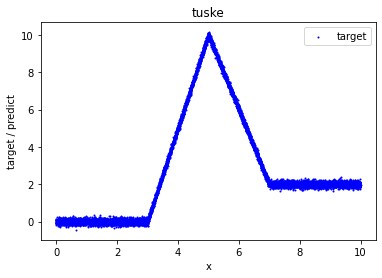

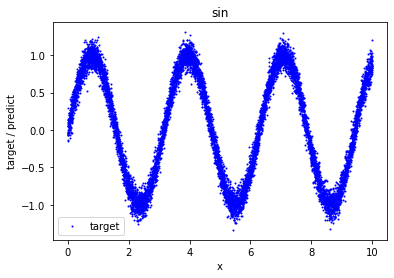

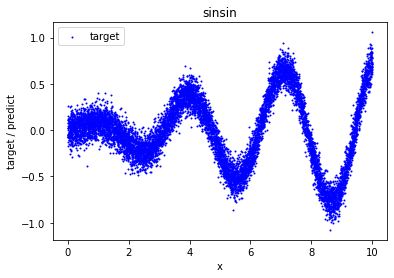

In [7]:
for k in dataset_collection.keys():
    egydimenziosat_rajzol(dataset_collection[k],k)
    plt.show()

## Modellek és képességeik

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


In [9]:
model_collection={}

model_collection['linreg']=LinearRegression()
model_collection['knn5']=KNeighborsRegressor(n_neighbors=5,weights='distance')
model_collection['knn100']=KNeighborsRegressor(n_neighbors=100,weights='distance')
model_collection['tree2']=DecisionTreeRegressor(max_depth=2,random_state=42)
model_collection['tree5']=DecisionTreeRegressor(max_depth=5,random_state=42)
model_collection['rf2']=RandomForestRegressor(n_estimators=100,max_depth=2,random_state=42)
model_collection['rf5']=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
model_collection['gbm2']=GradientBoostingRegressor(n_estimators=100,max_depth=2,random_state=42)
model_collection['gbm5']=GradientBoostingRegressor(n_estimators=100,max_depth=5,random_state=42)
model_collection['ann-2-2']=MLPRegressor(hidden_layer_sizes=(2,2),max_iter=2500,random_state=42)
model_collection['ann-7-5basic']=MLPRegressor(hidden_layer_sizes=(7,5),max_iter=5000,random_state=42)
model_collection['ann-7-5optim']=MLPRegressor(hidden_layer_sizes=(7,5),max_iter=5000,random_state=42,
                                        learning_rate='adaptive',
                                        activation='tanh',
                                        solver='lbfgs')



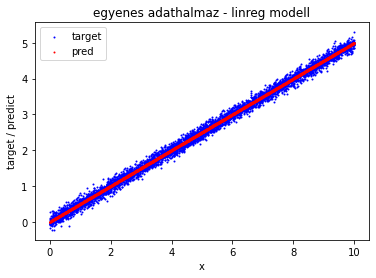

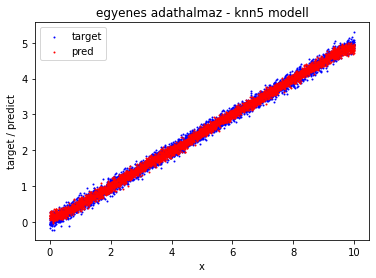

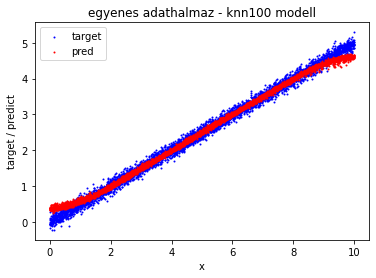

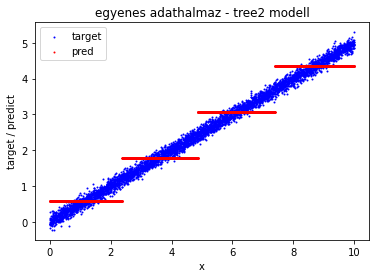

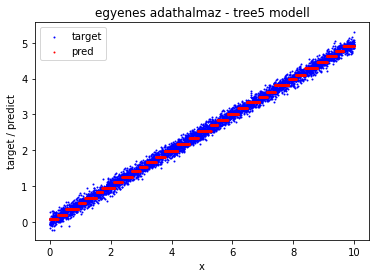

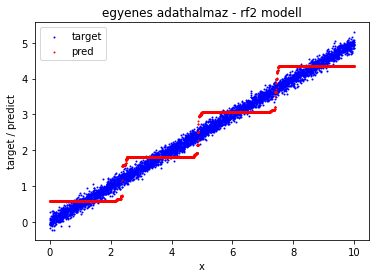

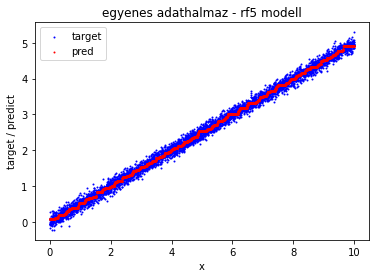

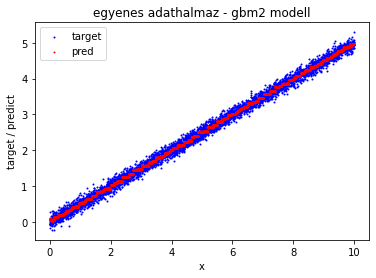

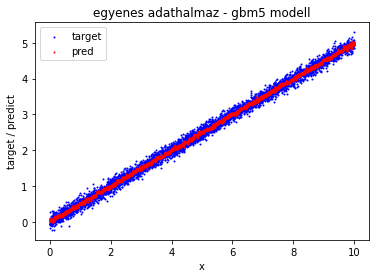

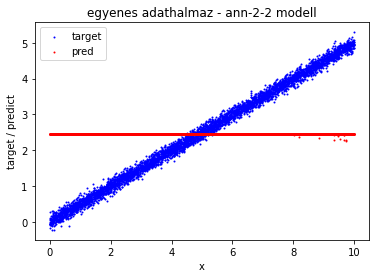

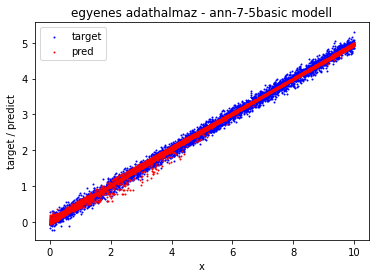

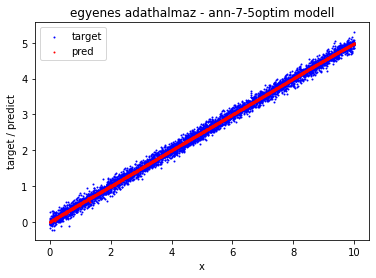

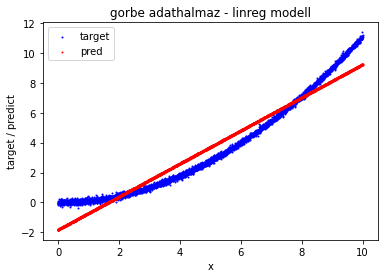

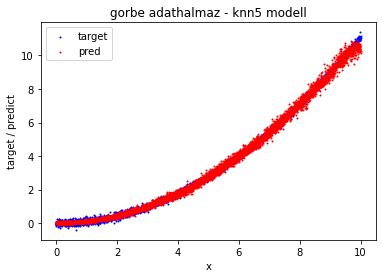

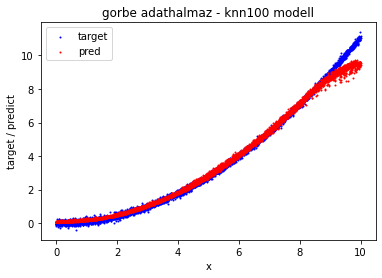

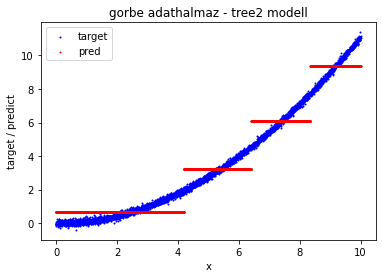

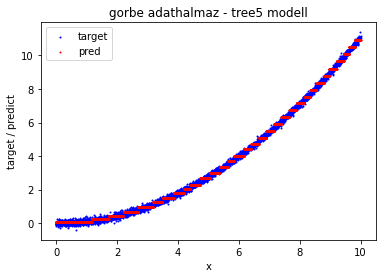

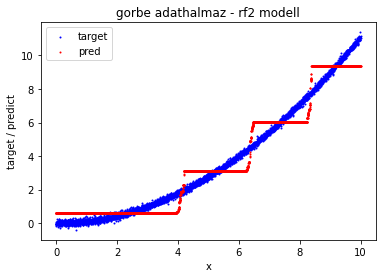

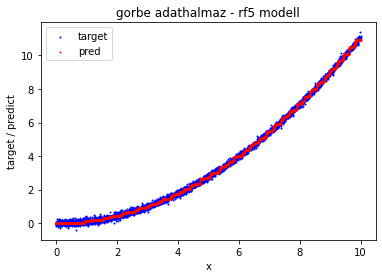

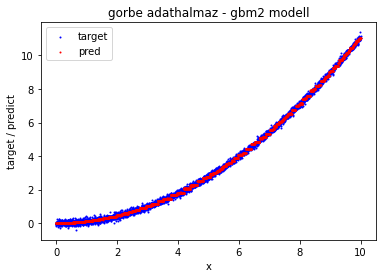

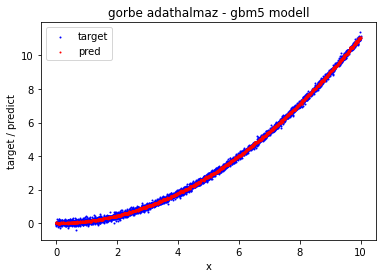

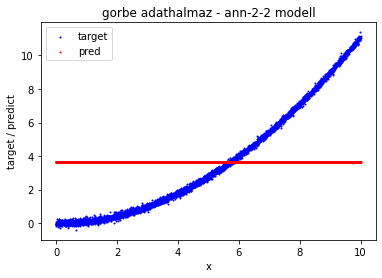

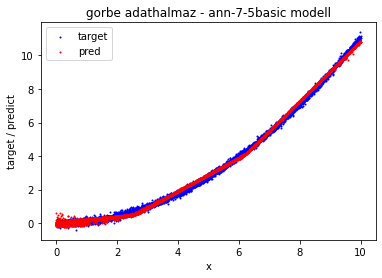

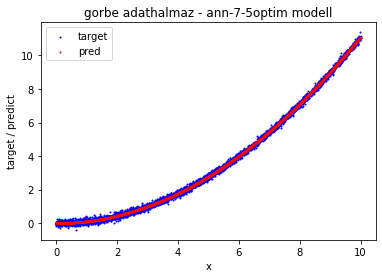

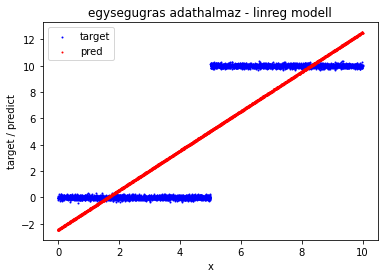

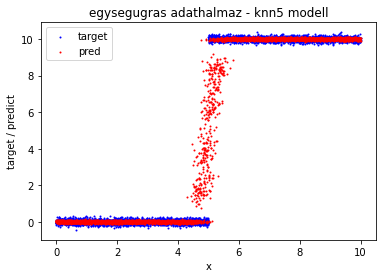

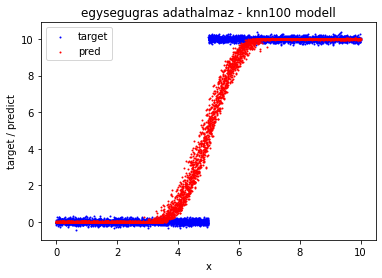

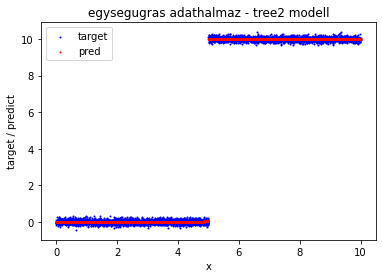

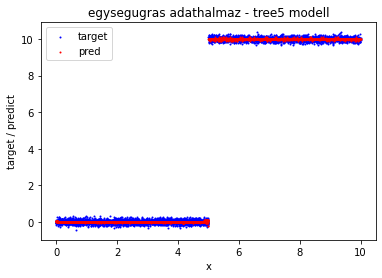

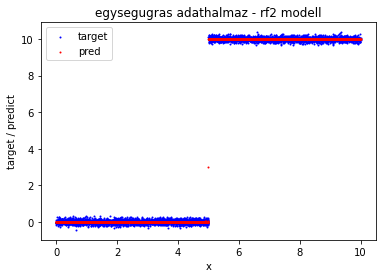

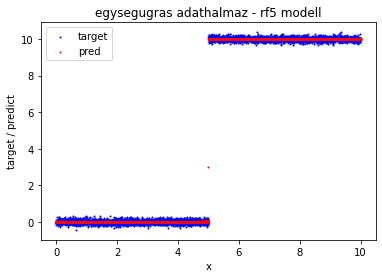

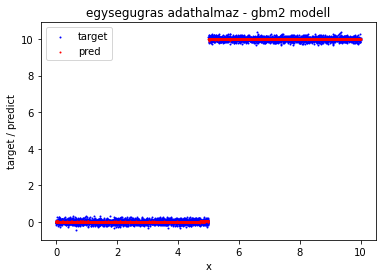

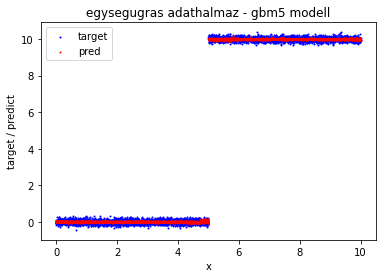

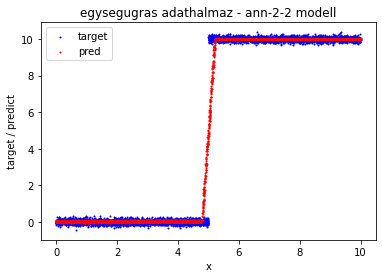

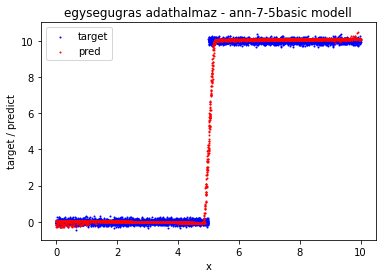

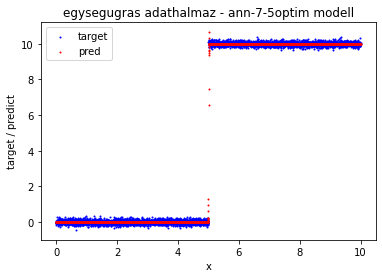

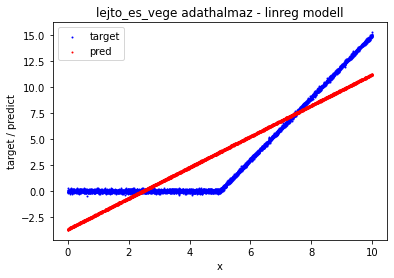

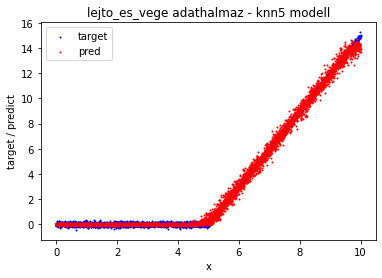

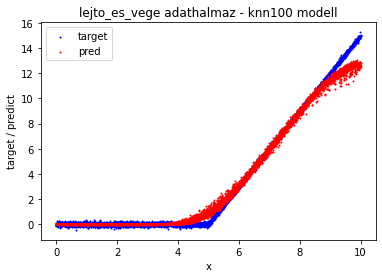

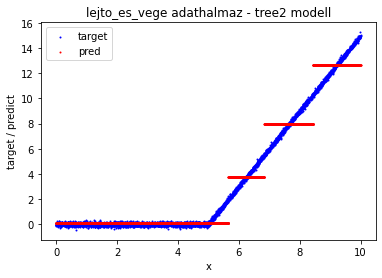

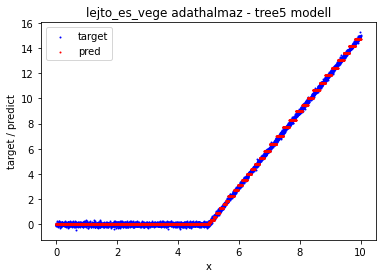

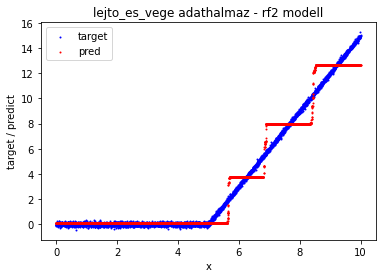

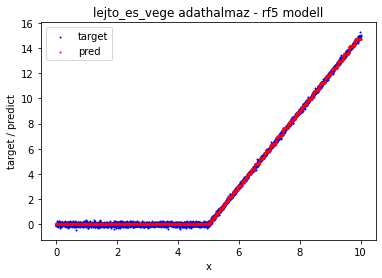

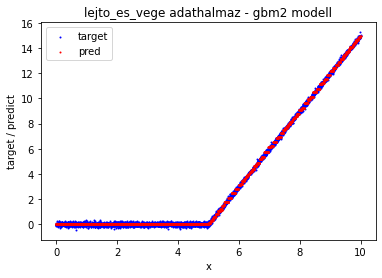

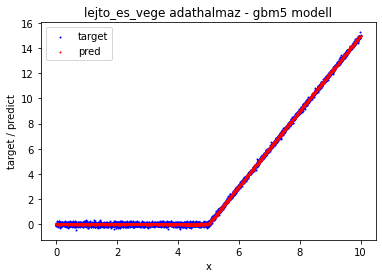

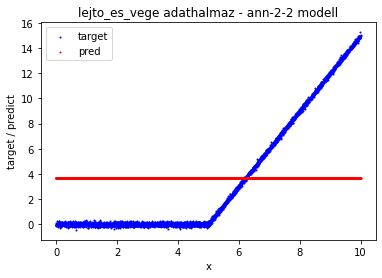

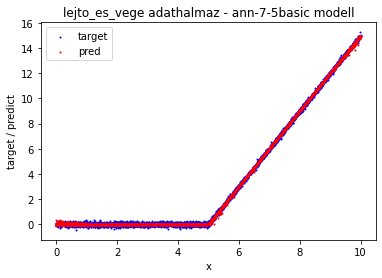

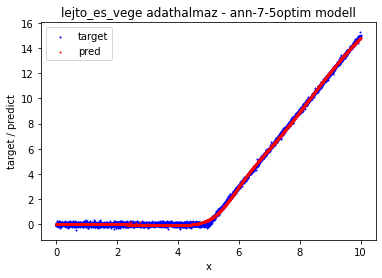

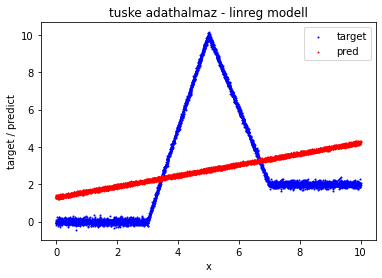

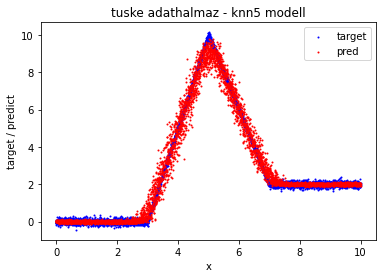

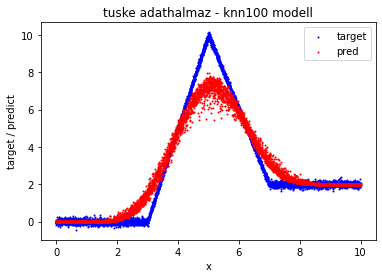

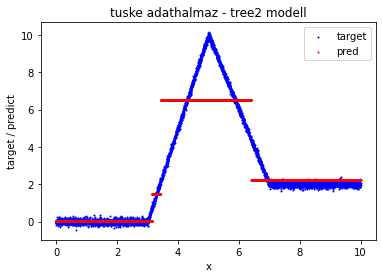

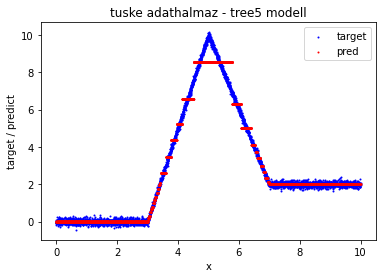

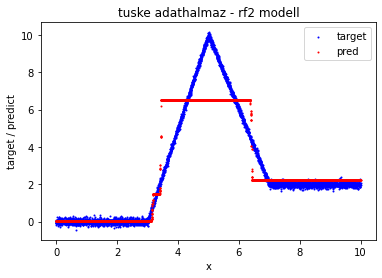

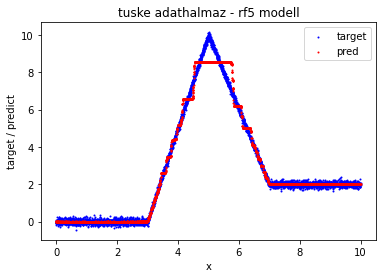

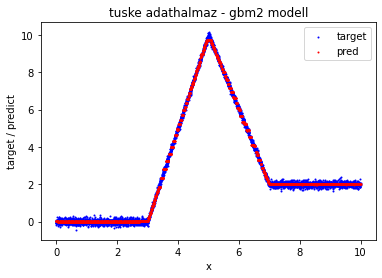

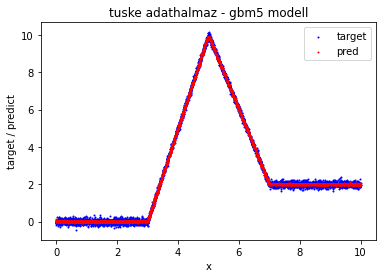

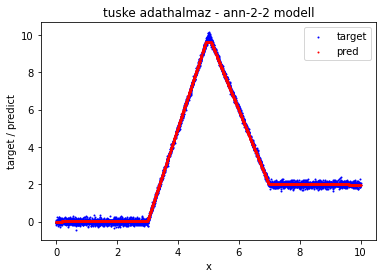

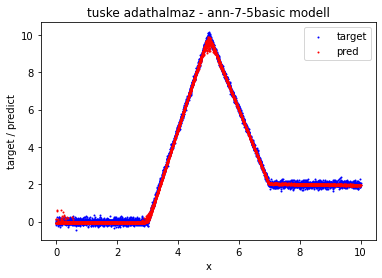

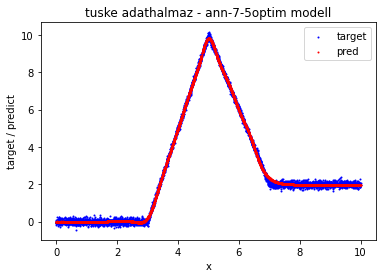

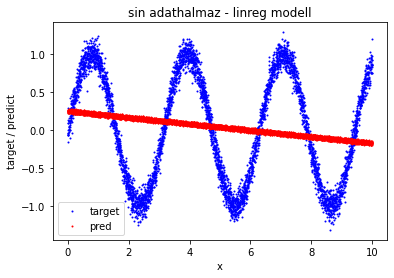

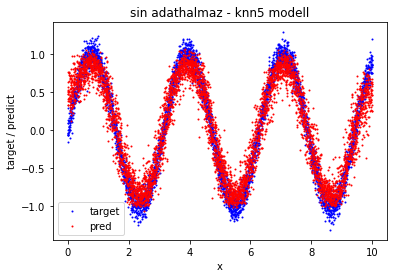

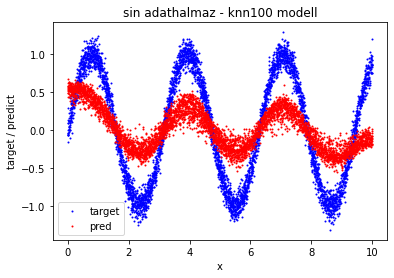

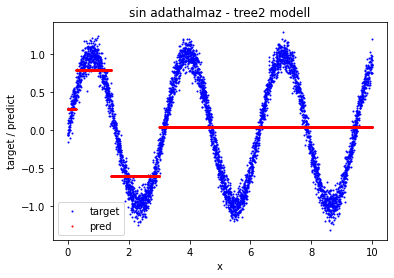

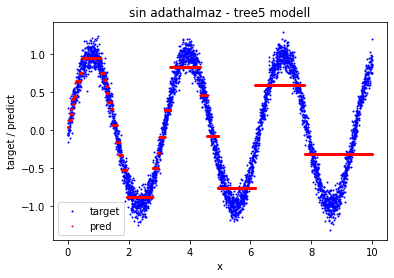

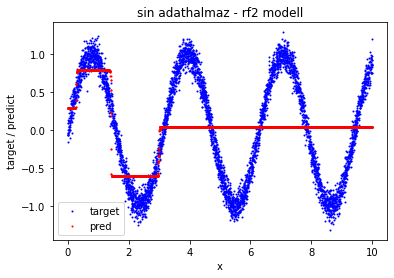

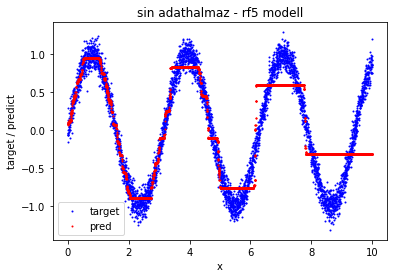

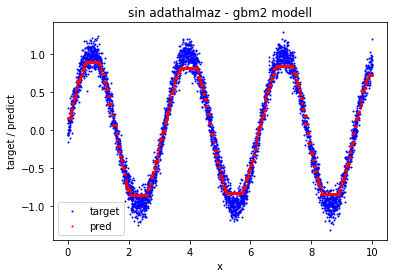

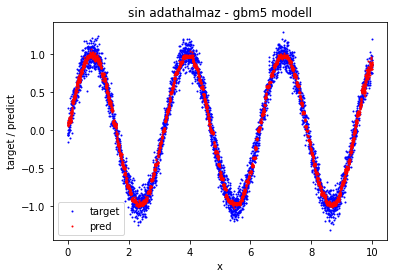

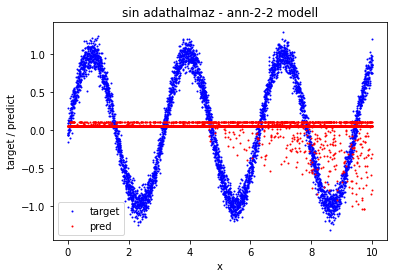

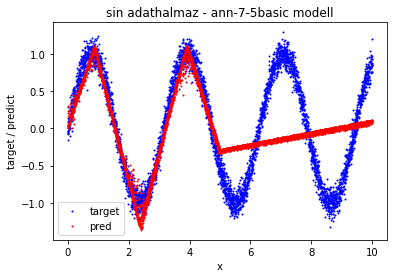

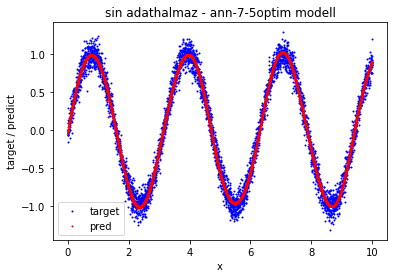

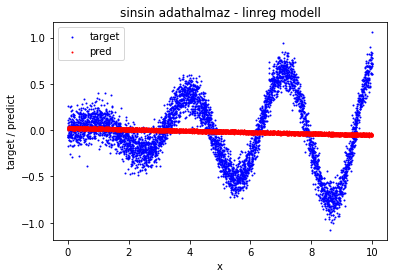

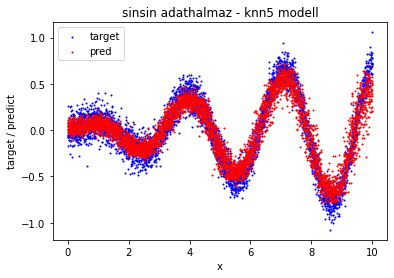

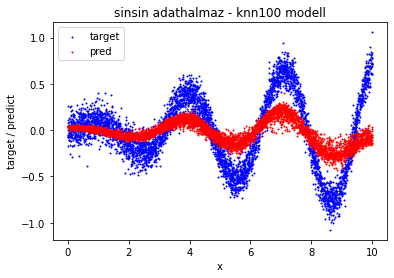

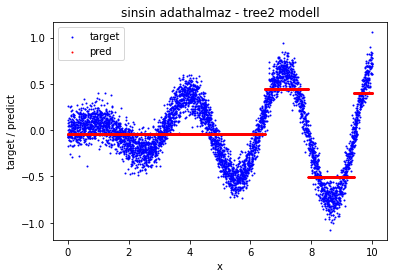

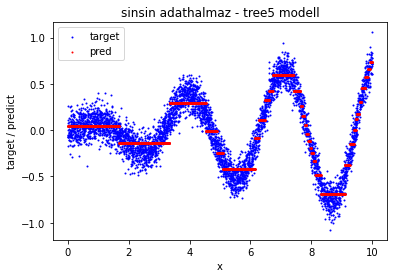

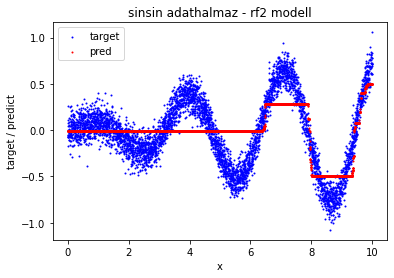

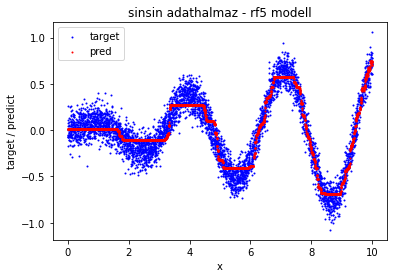

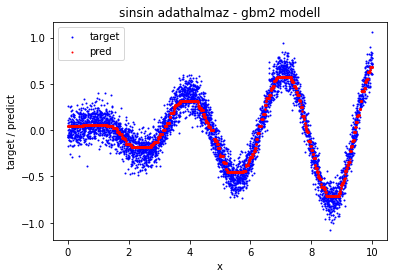

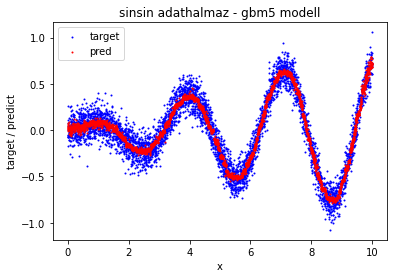

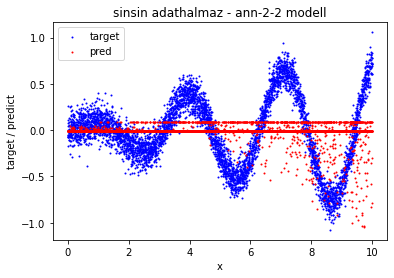

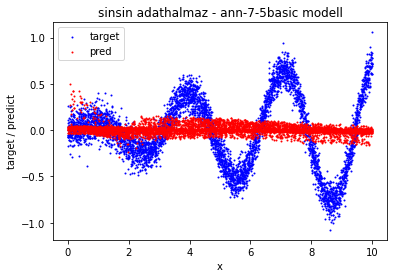

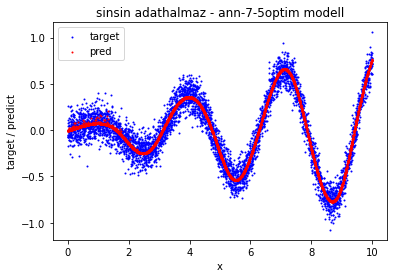

In [10]:
for k in dataset_collection.keys():
    df=dataset_collection[k]
    train_df=df.iloc[:5000,:].copy()
    test_df=df.iloc[5000:,:].copy()
    
    for mname in model_collection.keys():
        np.random.seed(42)
        model=model_collection[mname]
        model.fit(train_df[train_df.columns[:-1]],train_df['target'])
        test_df['pred']=model.predict(test_df[train_df.columns[:-1]])
        egydimenziosat_rajzol(test_df,k+" adathalmaz - "+mname + " modell")
        plt.show()

## Interpoláció és extrapoláció vizsgálata

In [11]:
from matplotlib.patches import Rectangle

In [12]:
def elemkivago(indf,cut_min_v=0.0,cut_max_v=0.1):
    outdf=indf.copy()
    outdf=outdf[  (outdf['x']<=cut_min_v) | (outdf['x']>cut_max_v)]
    return outdf.copy()

### Extrapoláció

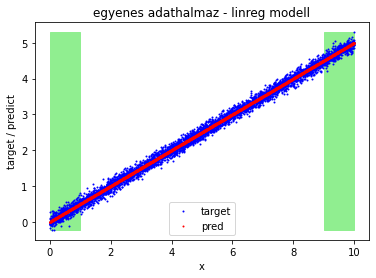

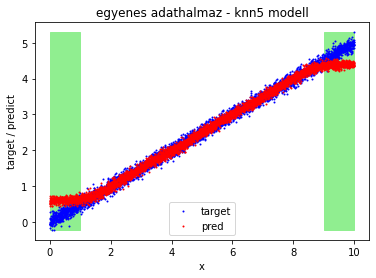

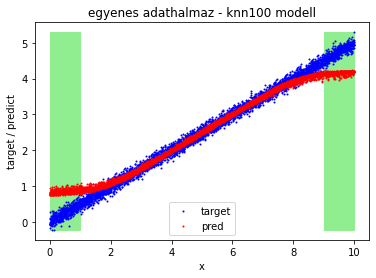

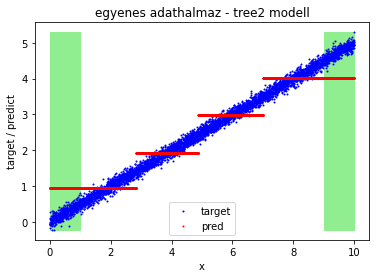

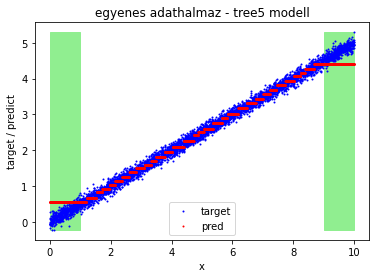

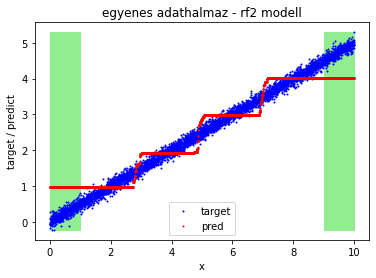

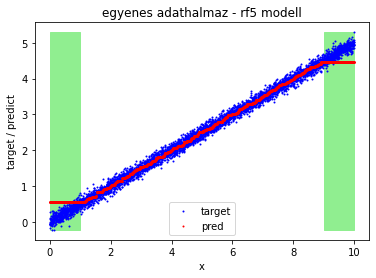

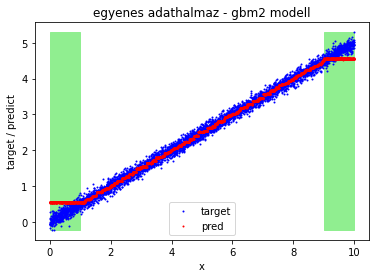

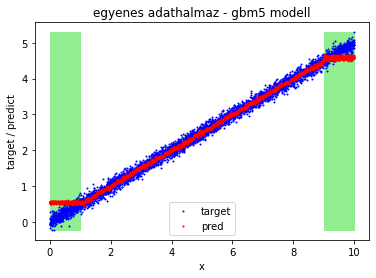

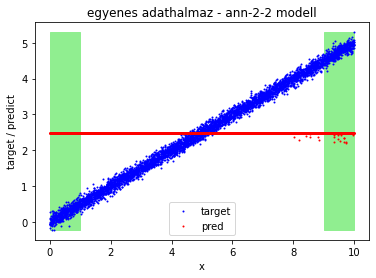

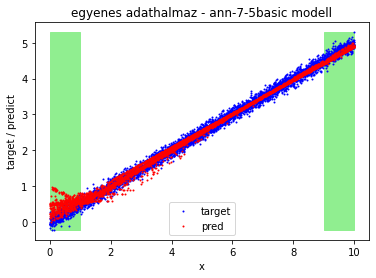

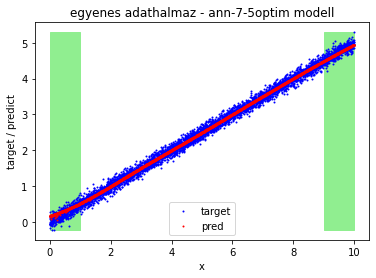

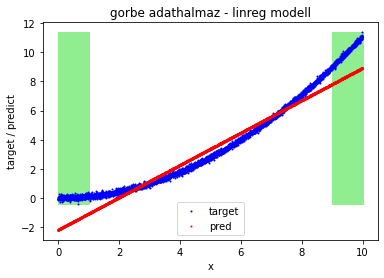

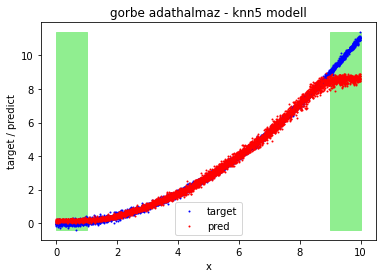

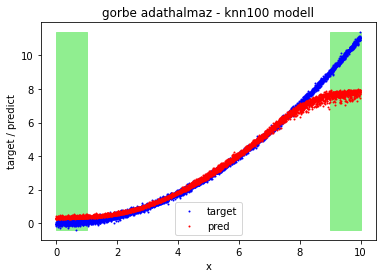

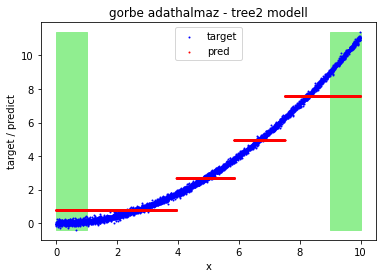

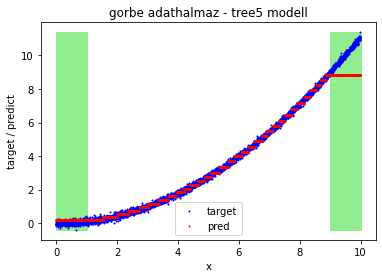

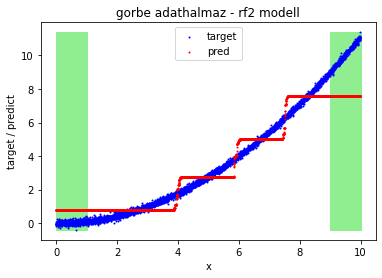

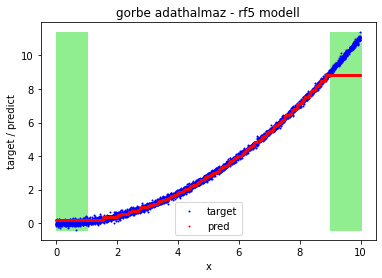

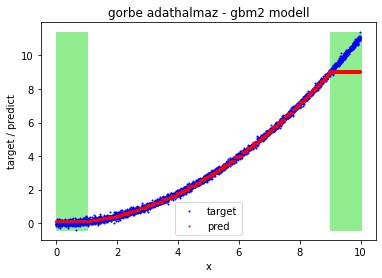

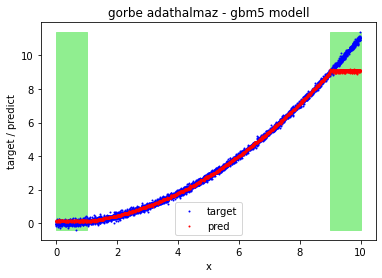

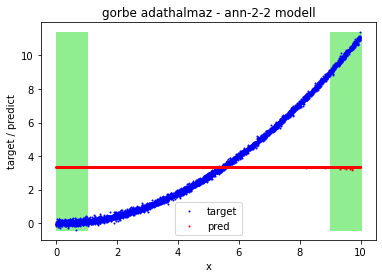

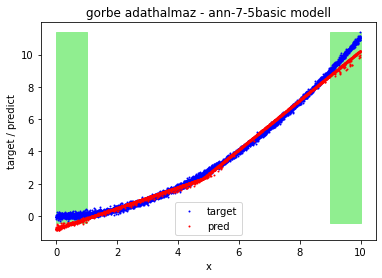

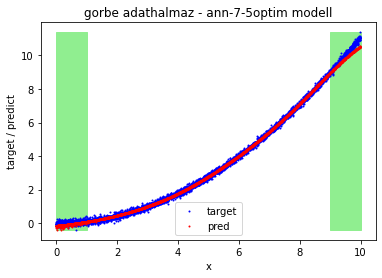

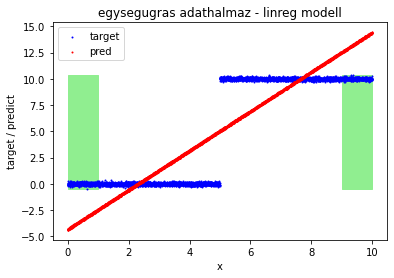

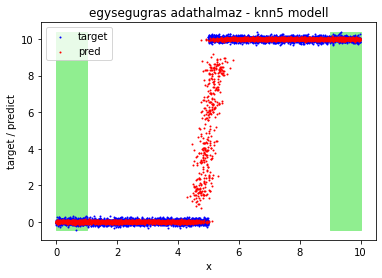

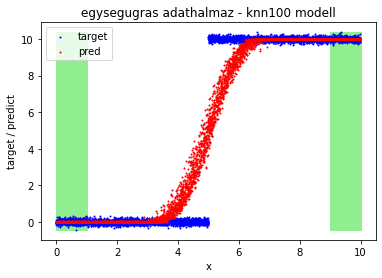

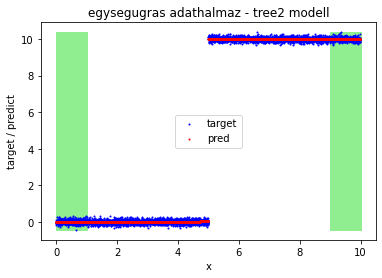

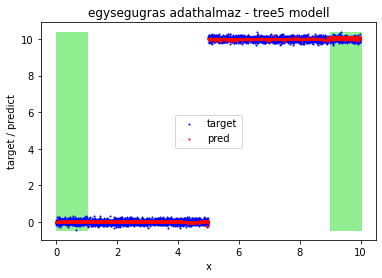

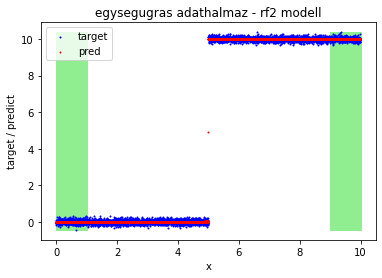

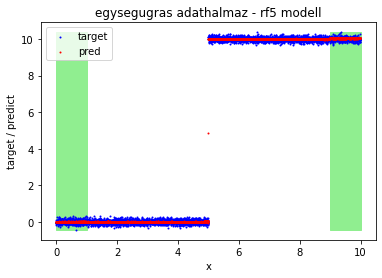

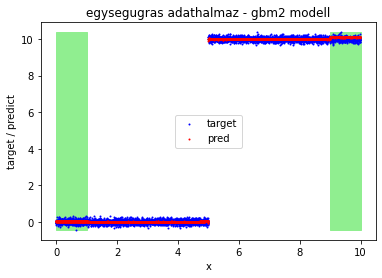

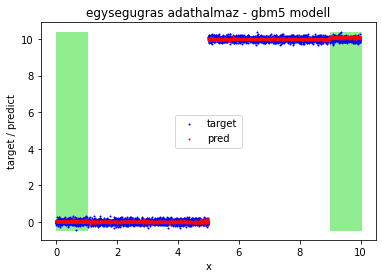

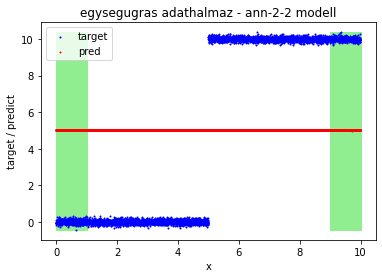

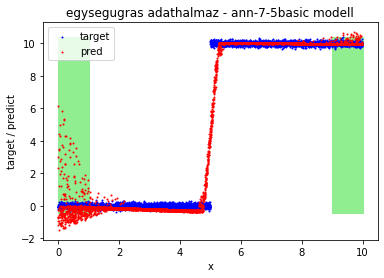

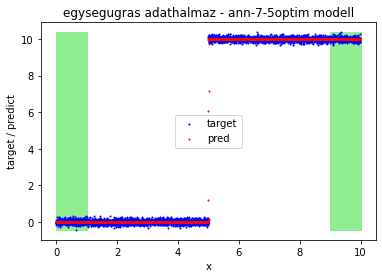

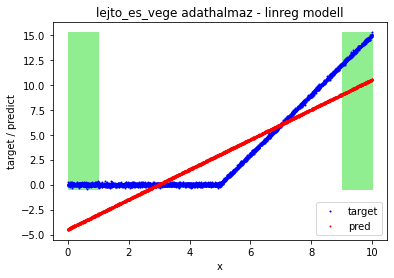

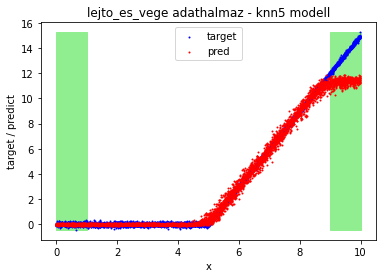

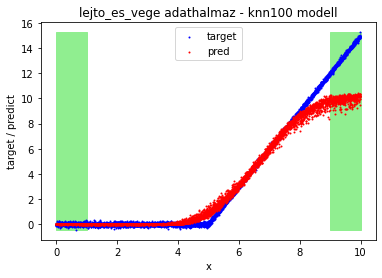

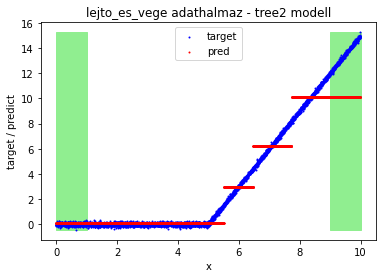

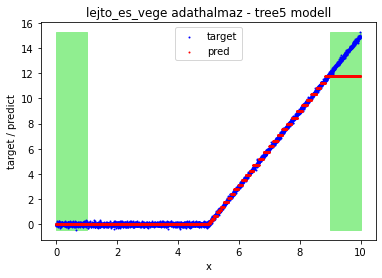

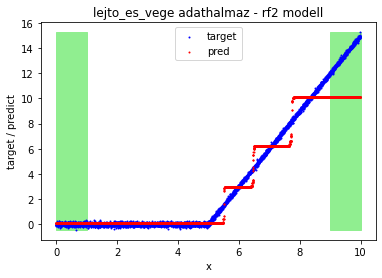

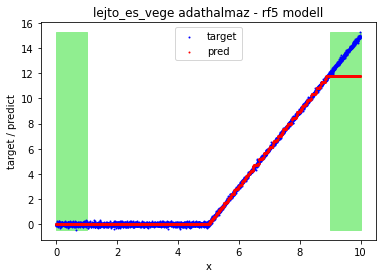

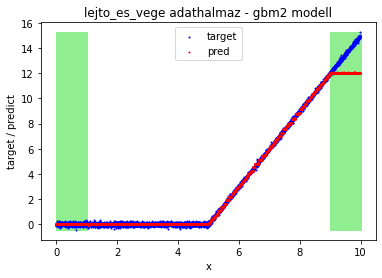

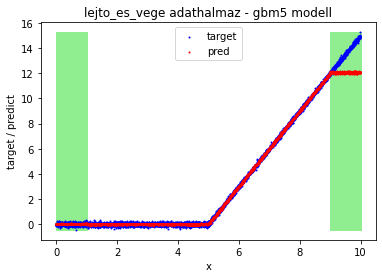

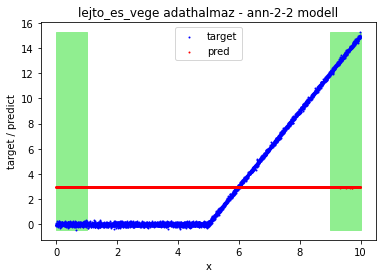

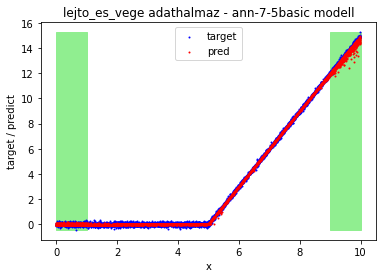

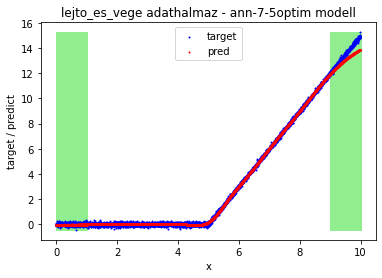

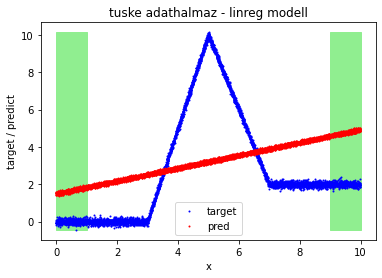

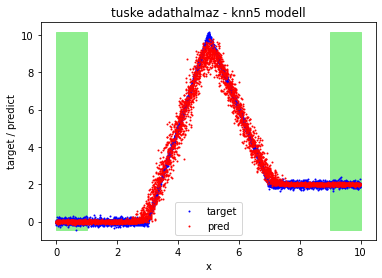

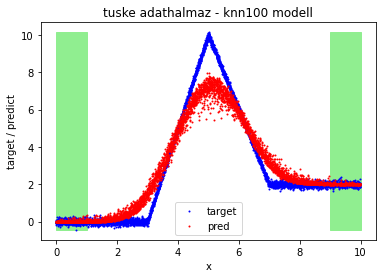

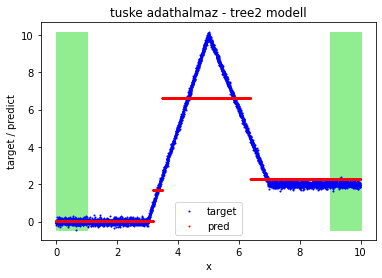

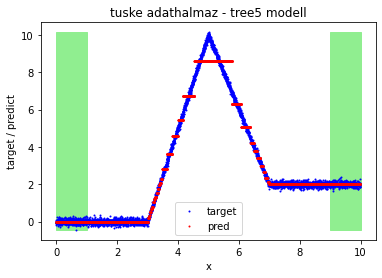

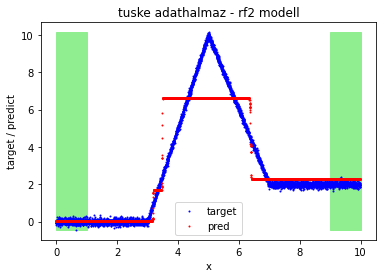

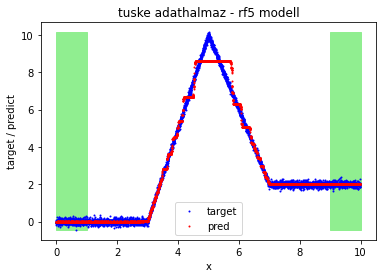

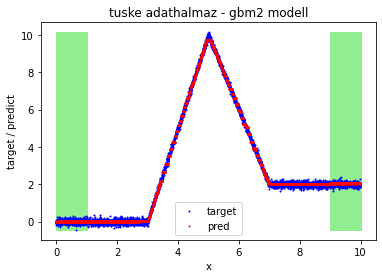

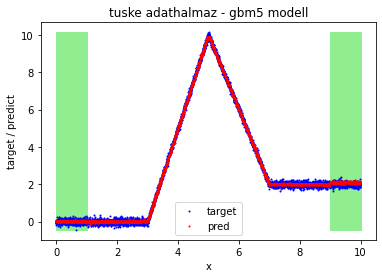

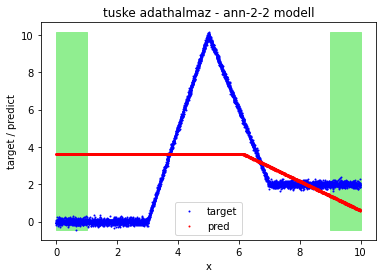

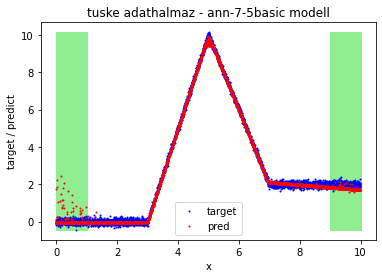

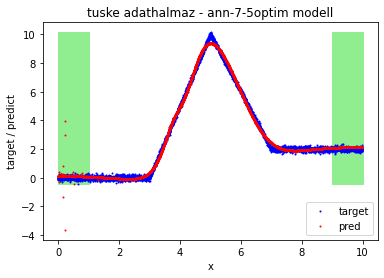

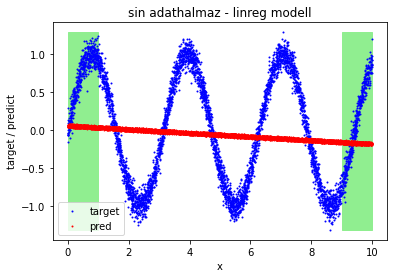

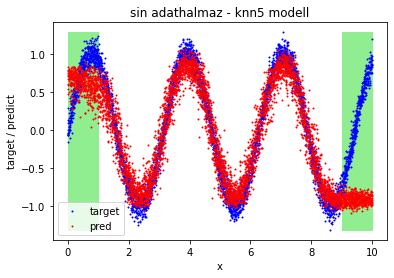

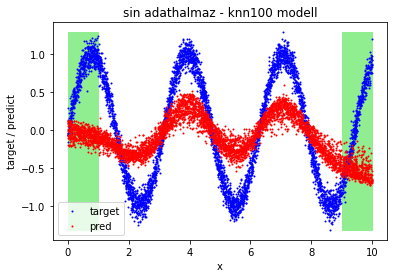

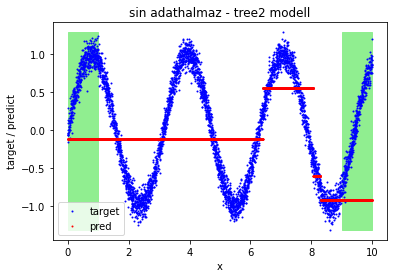

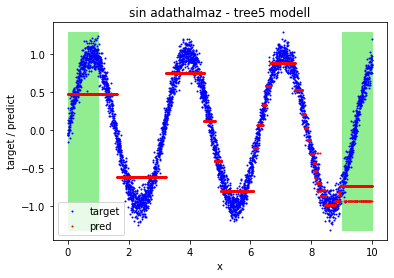

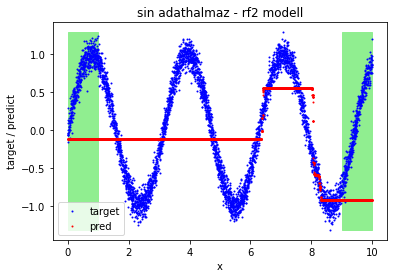

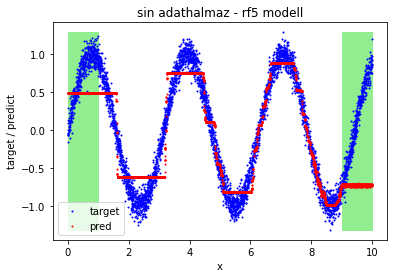

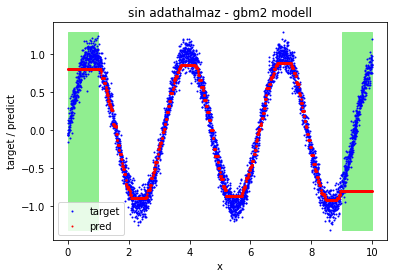

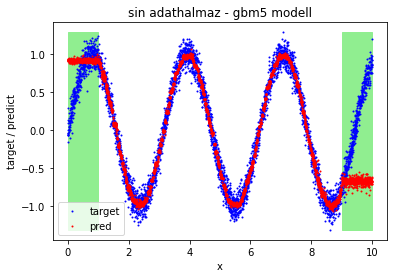

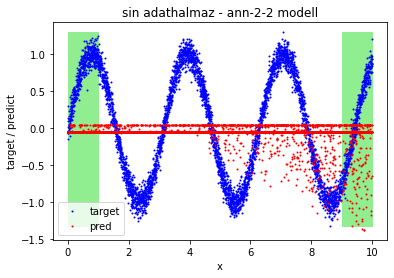

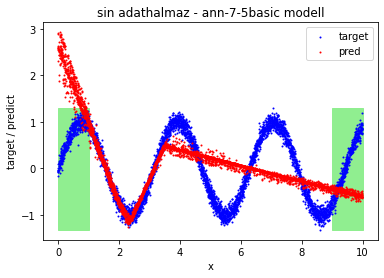

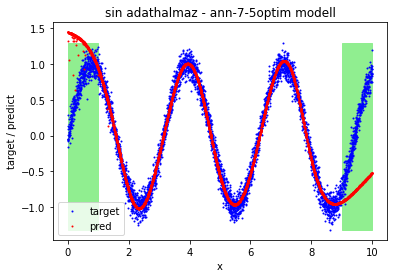

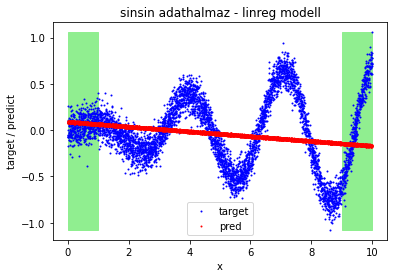

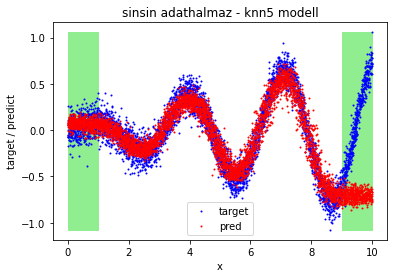

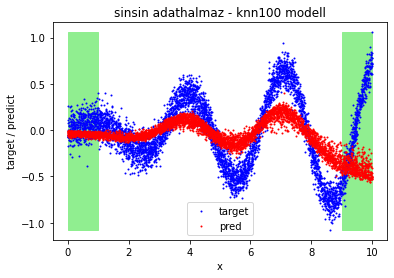

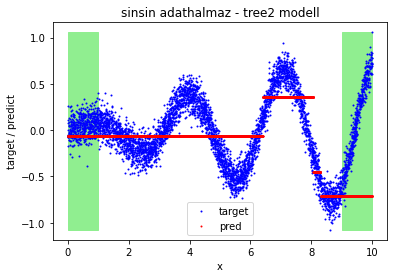

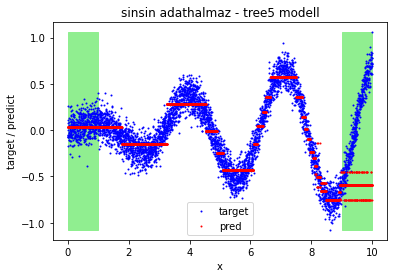

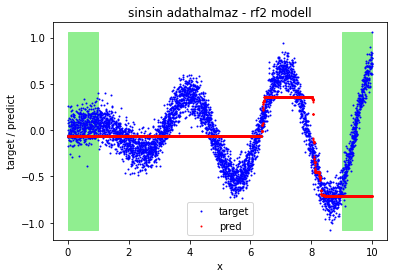

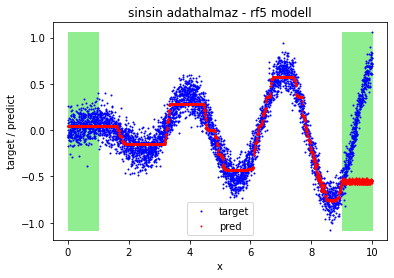

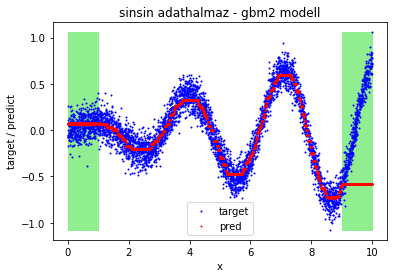

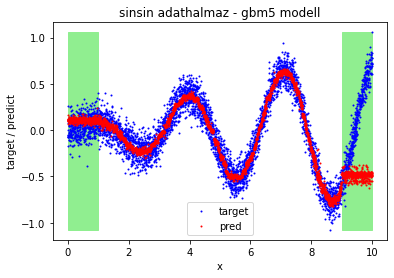

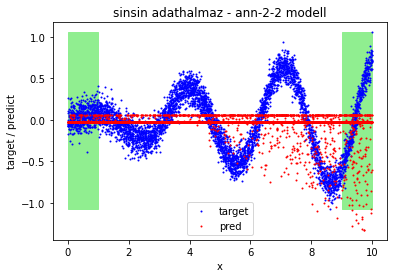

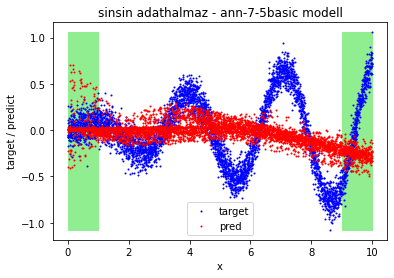

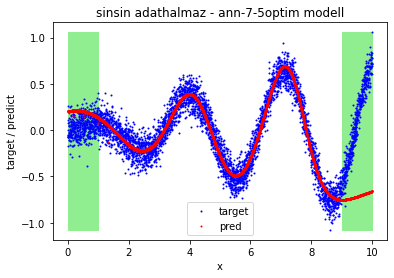

In [13]:
for k in dataset_collection.keys():
    df=dataset_collection[k]
    train_df=df.iloc[:5000,:].copy()
    train_df = elemkivago(train_df,0,1.0)
    train_df = elemkivago(train_df,9.0,10.0)
    
    test_df=df.iloc[5000:,:].copy()
    
    for mname in model_collection.keys():
        random.seed(42)
        model=model_collection[mname]
        model.fit(train_df[train_df.columns[:-1]],train_df['target'])
        test_df['pred']=model.predict(test_df[train_df.columns[:-1]])
        fig, ax = plt.subplots()
        ax.add_patch(Rectangle((0,np.min(test_df['target'])),1,abs(np.min(test_df['target']))+np.max(test_df['target']),color='lightgreen'))
        ax.add_patch(Rectangle((9,np.min(test_df['target'])),1,abs(np.min(test_df['target']))+np.max(test_df['target']),color='lightgreen'))
        
        egydimenziosat_rajzol(test_df,k+" adathalmaz - "+mname + " modell")
        plt.show()


### Interpoláció

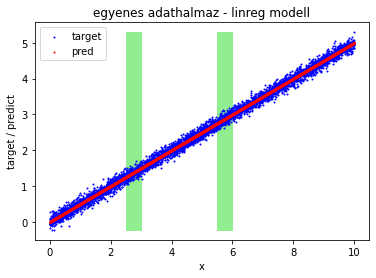

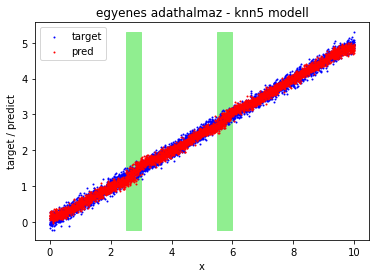

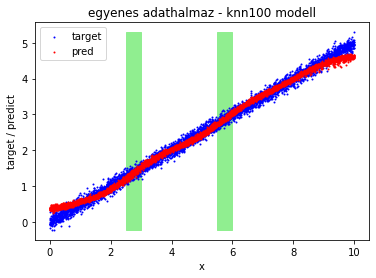

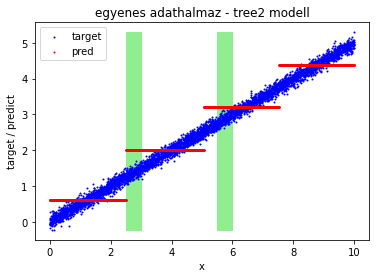

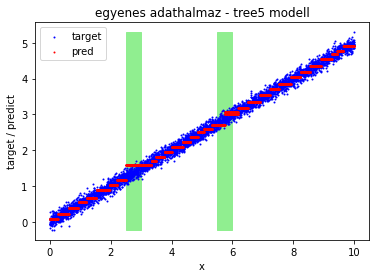

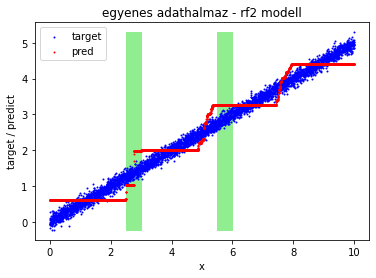

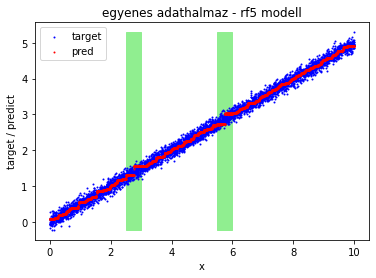

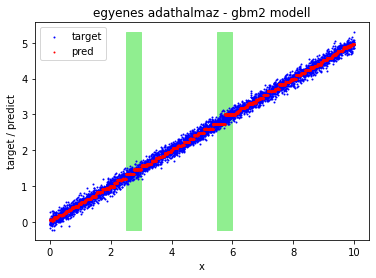

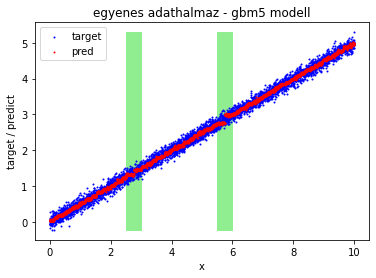

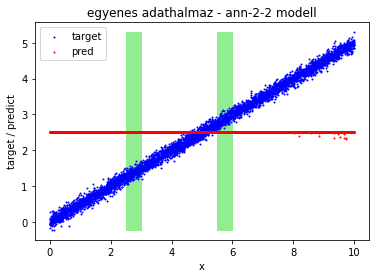

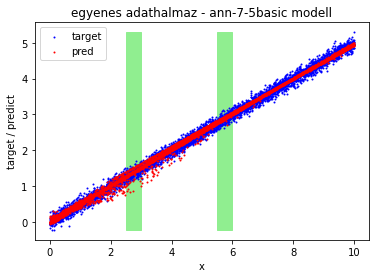

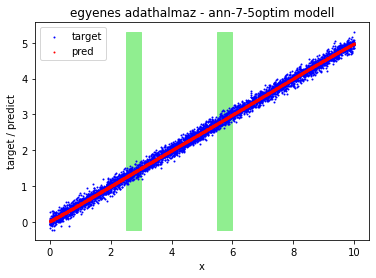

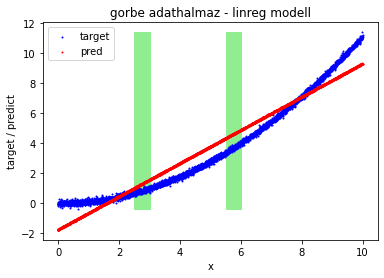

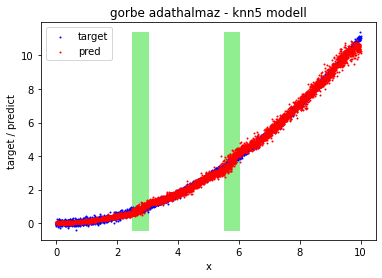

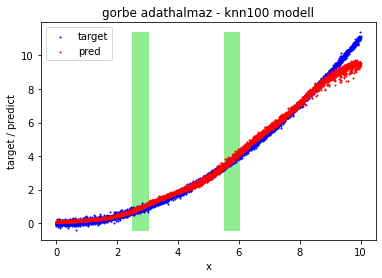

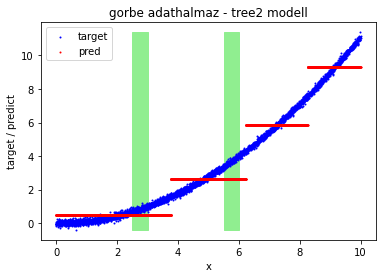

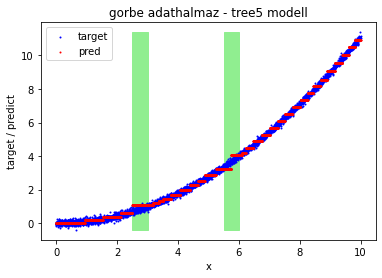

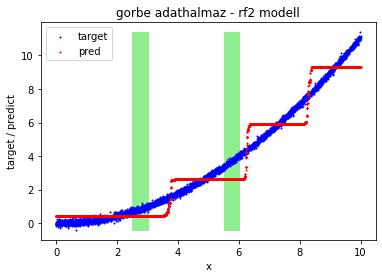

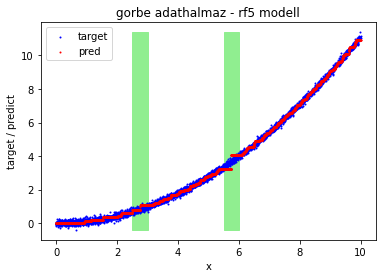

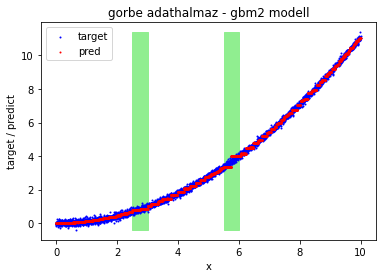

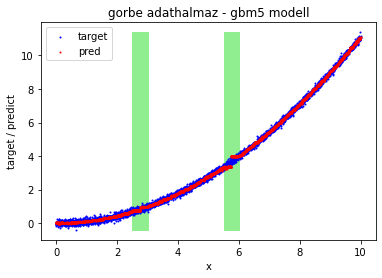

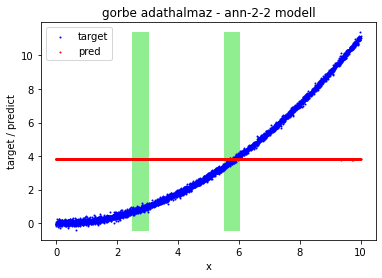

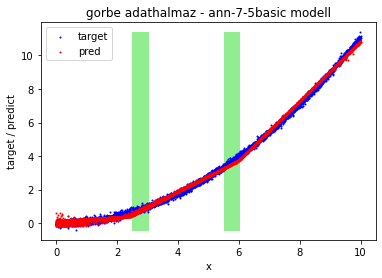

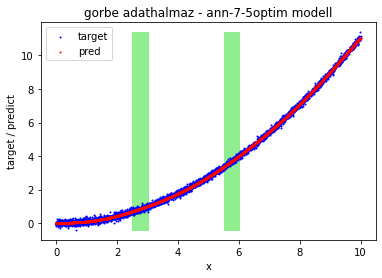

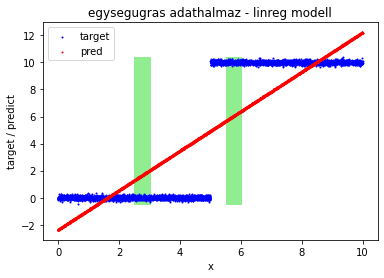

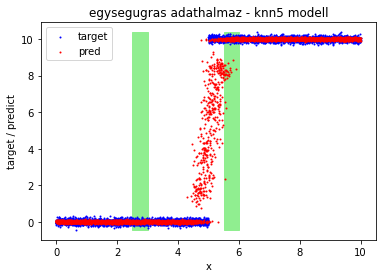

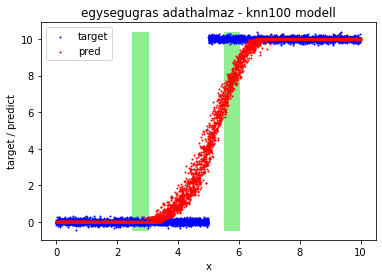

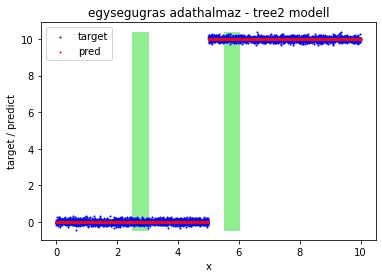

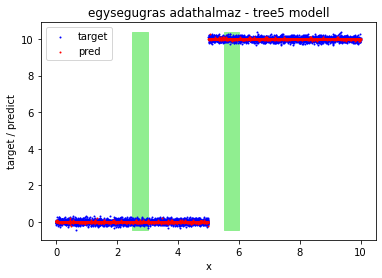

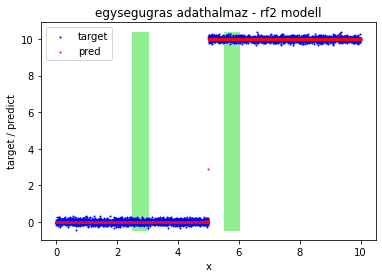

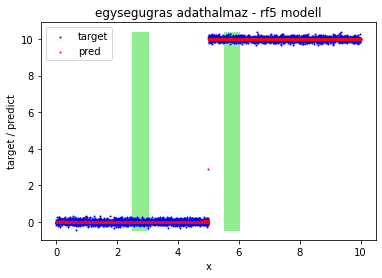

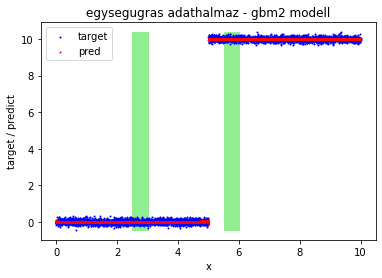

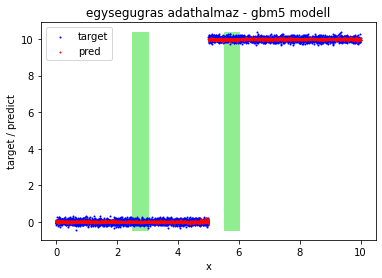

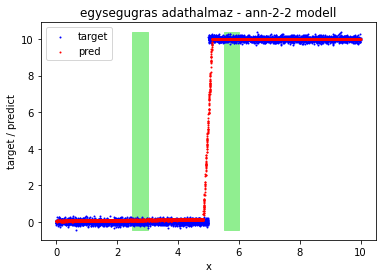

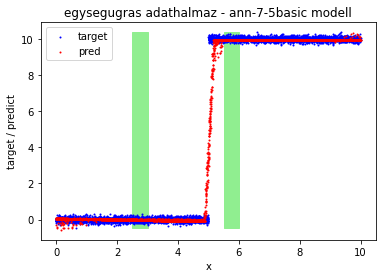

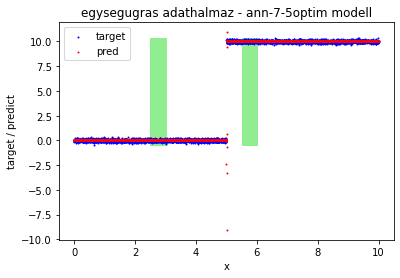

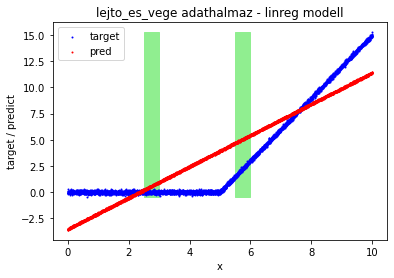

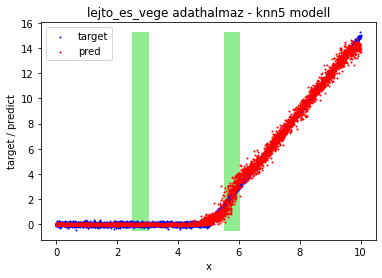

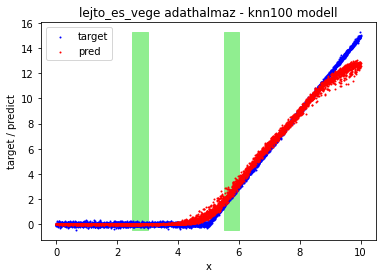

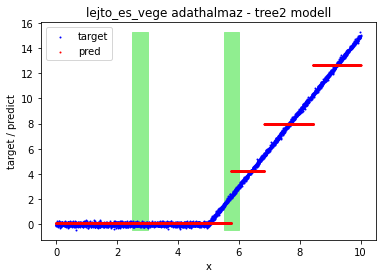

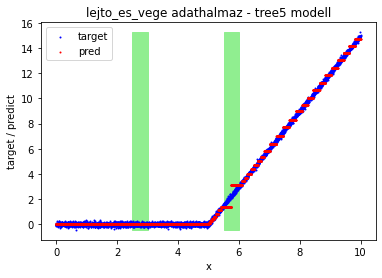

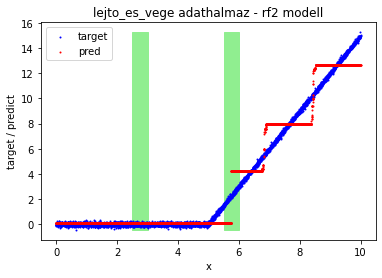

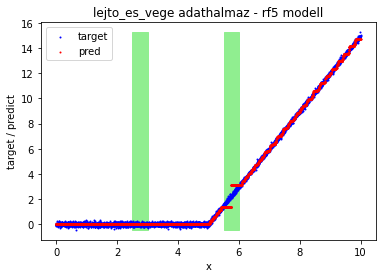

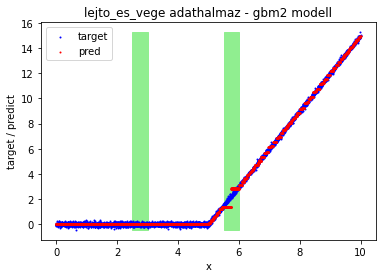

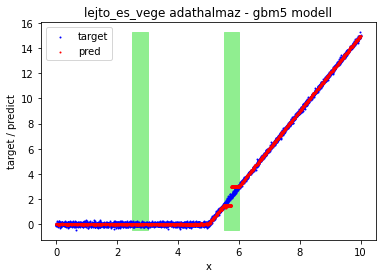

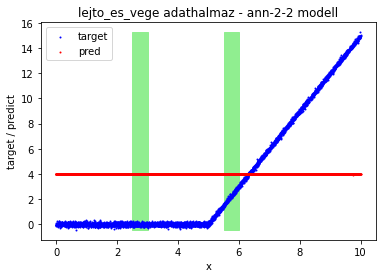

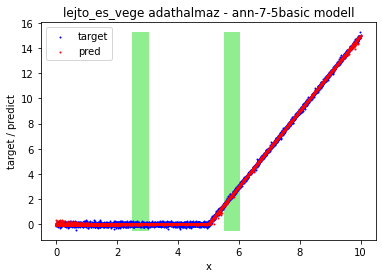

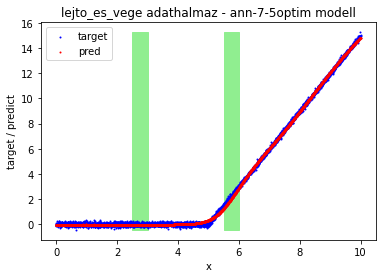

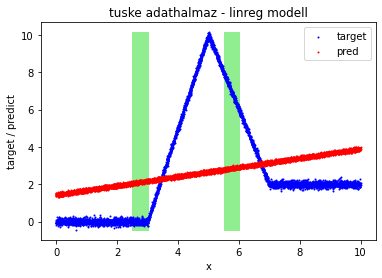

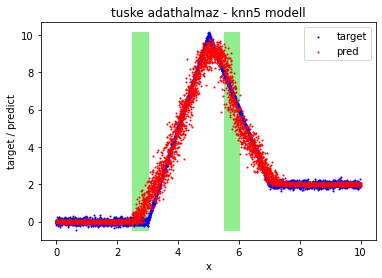

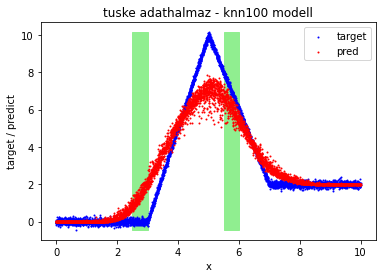

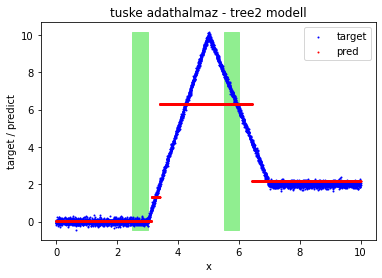

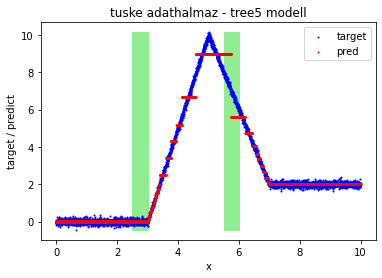

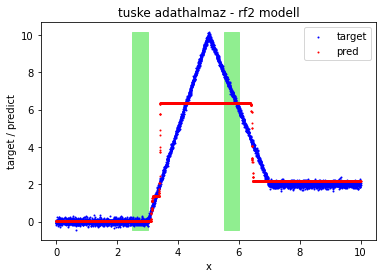

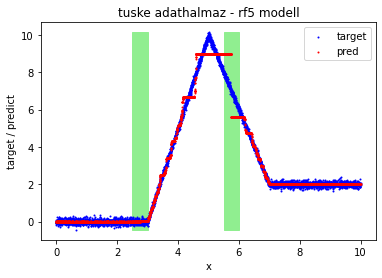

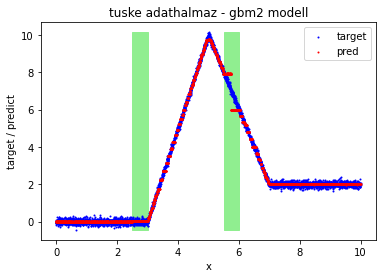

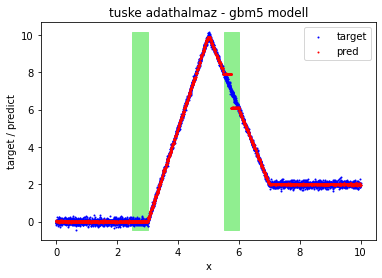

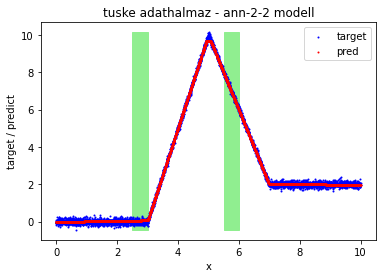

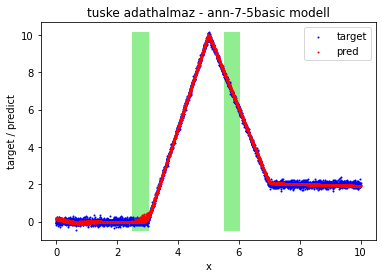

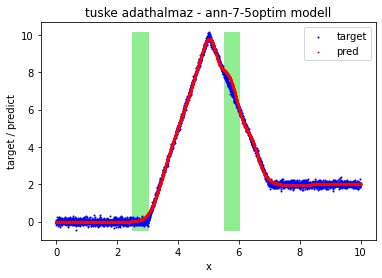

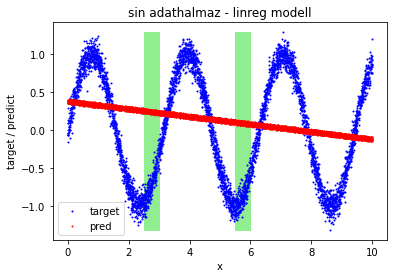

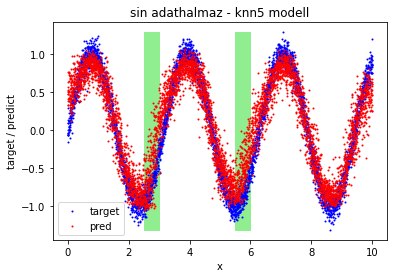

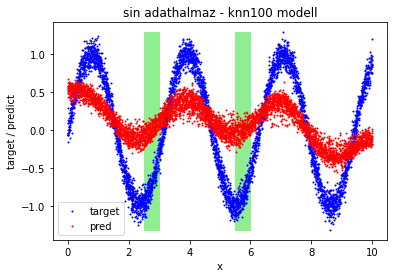

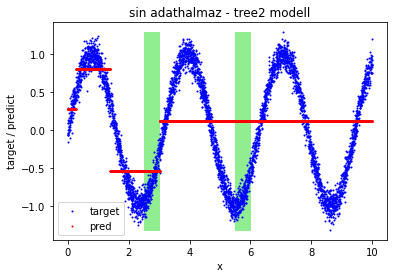

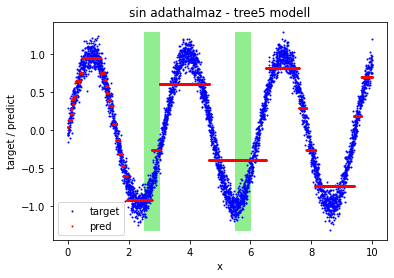

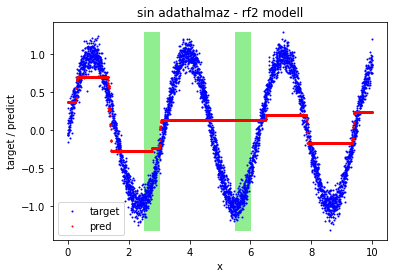

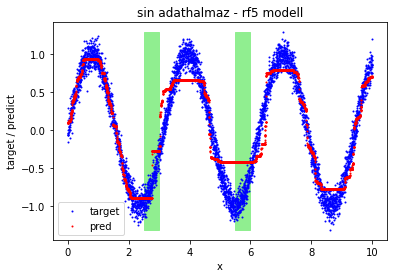

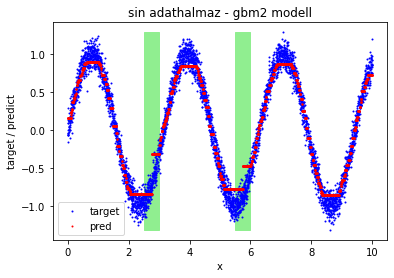

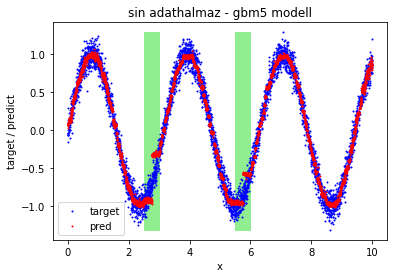

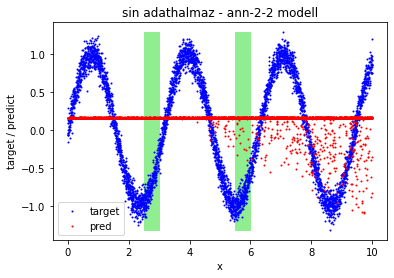

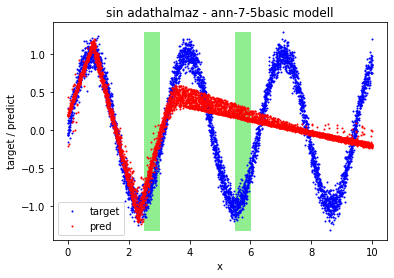

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


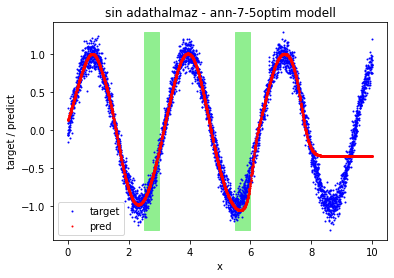

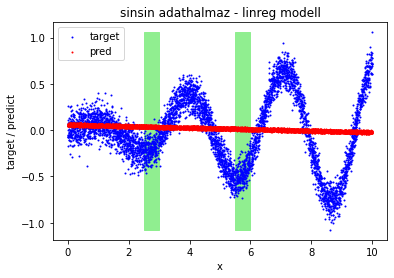

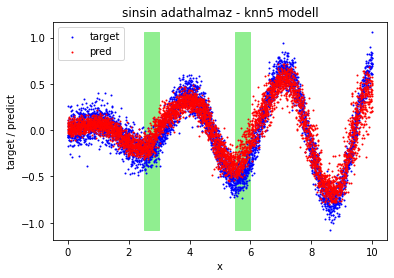

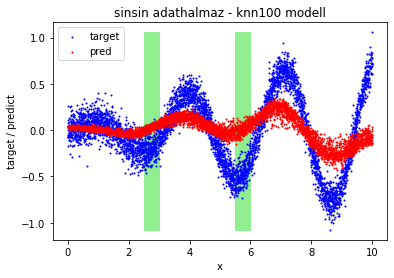

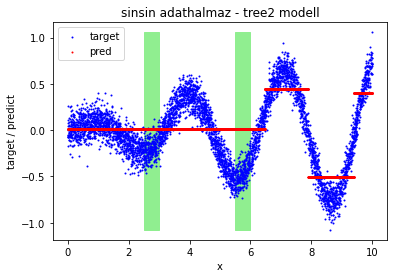

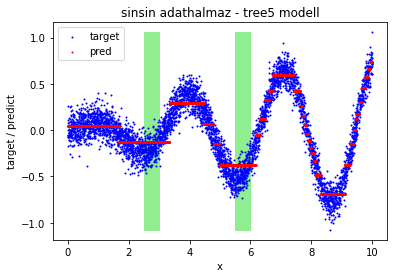

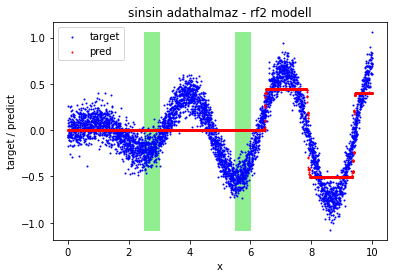

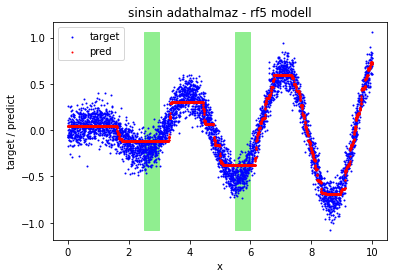

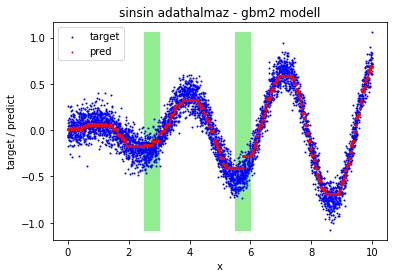

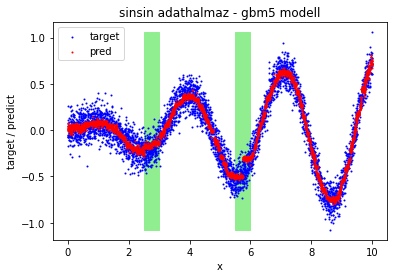

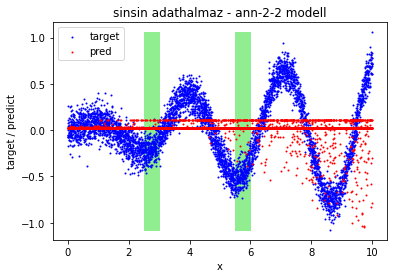

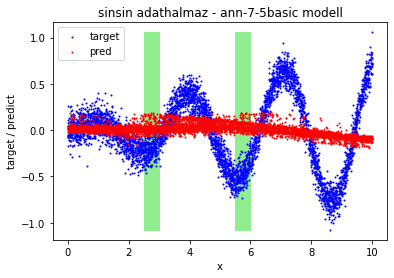

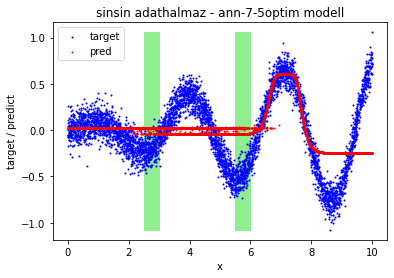

In [14]:
for k in dataset_collection.keys():
    df=dataset_collection[k]
    train_df=df.iloc[:5000,:].copy()
    train_df = elemkivago(train_df,2.5,3.0)
    train_df = elemkivago(train_df,5.5,6.0)
    
    test_df=df.iloc[5000:,:].copy()
    
    for mname in model_collection.keys():
        random.seed(42)
        model=model_collection[mname]
        model.fit(train_df[train_df.columns[:-1]],train_df['target'])
        test_df['pred']=model.predict(test_df[train_df.columns[:-1]])
        
        fig, ax = plt.subplots()
        ax.add_patch(Rectangle((2.5,np.min(test_df['target'])),0.5,abs(np.min(test_df['target']))+np.max(test_df['target']),color='lightgreen'))
        ax.add_patch(Rectangle((5.5,np.min(test_df['target'])),0.5,abs(np.min(test_df['target']))+np.max(test_df['target']),color='lightgreen'))
        
        
        egydimenziosat_rajzol(test_df,k+" adathalmaz - "+mname + " modell")
        plt.show()

## GBM és az neuron háló iterációs lépései

### GBM lépései

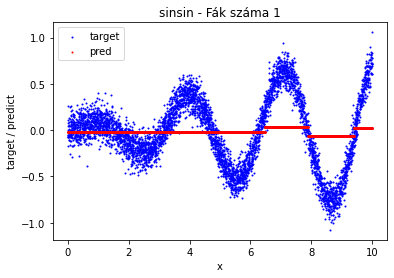

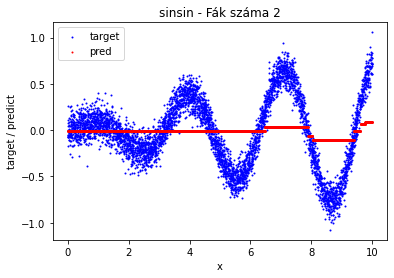

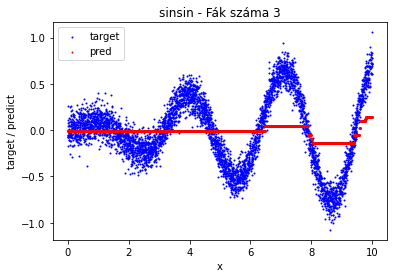

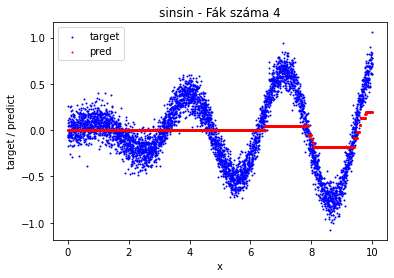

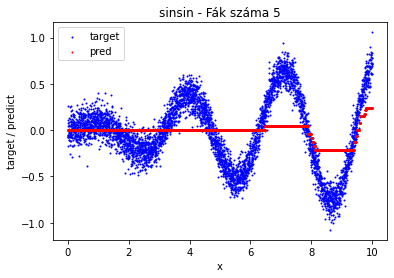

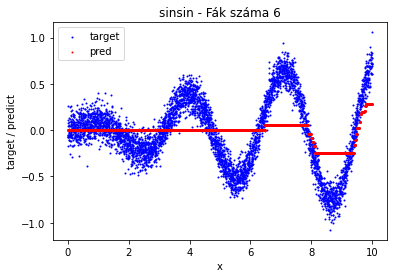

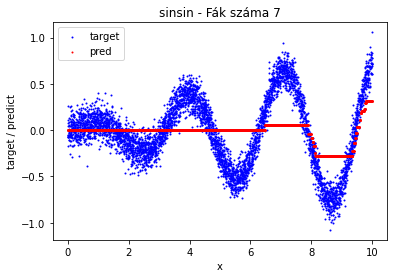

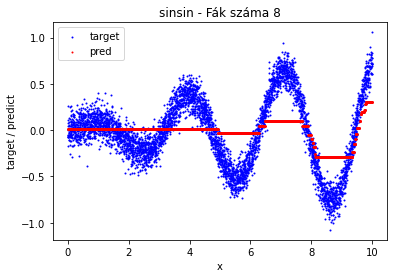

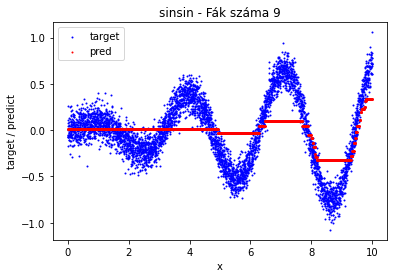

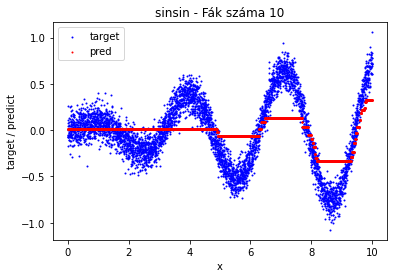

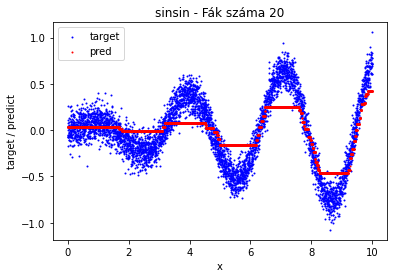

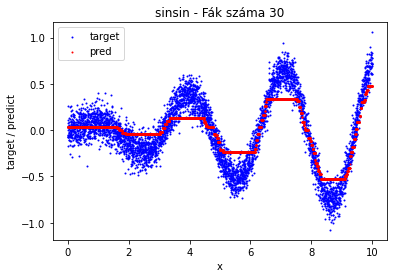

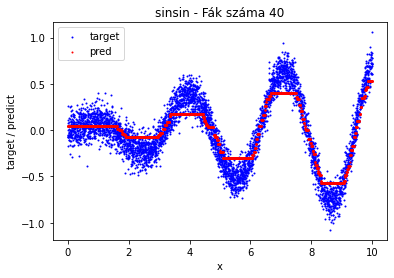

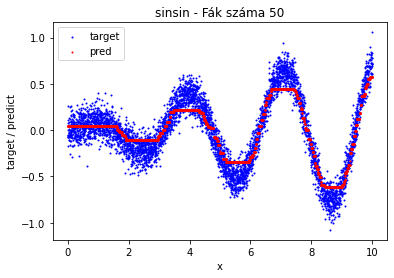

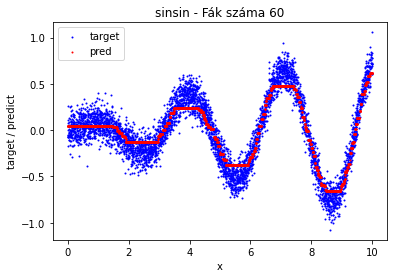

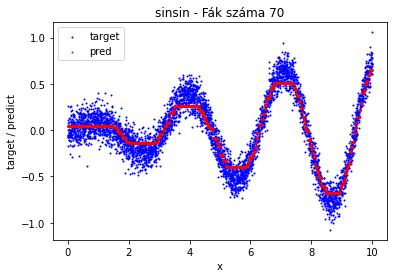

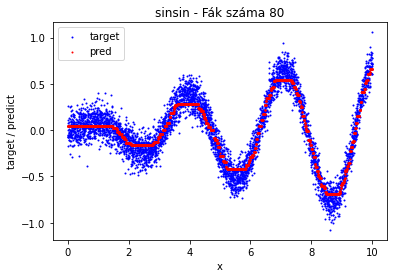

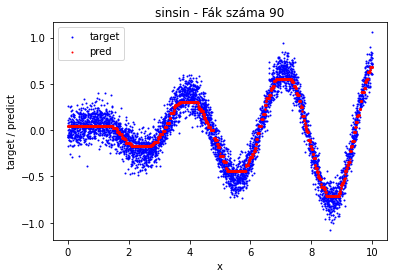

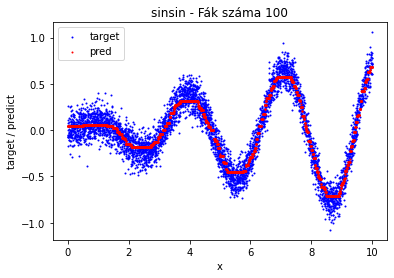

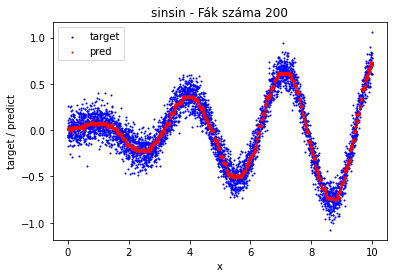

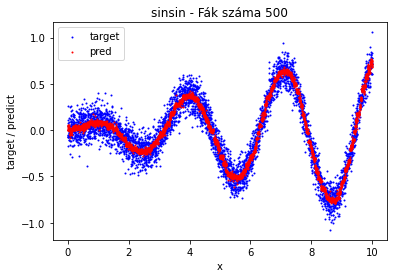

In [15]:
df=dataset_collection["sinsin"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()

model=GradientBoostingRegressor(n_estimators=1,max_depth=2,random_state=42)
for fak_szama in list(range(1,11,1))+list(range(20,101,10))+[200,500]:
    model.set_params(**({'n_estimators':fak_szama}))
    model.fit(train_df[train_df.columns[:-1]],train_df['target'])
    test_df['pred']=model.predict(test_df[train_df.columns[:-1]])
    egydimenziosat_rajzol(test_df,k+" - Fák száma "+str(fak_szama))
    plt.show()
    model.set_params(**({'warm_start':True}))

### Neuron háló iterációi

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


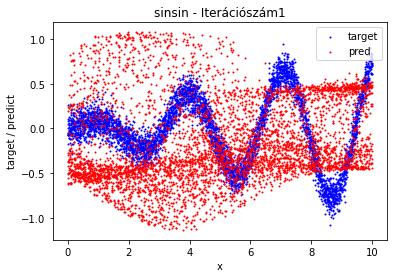

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


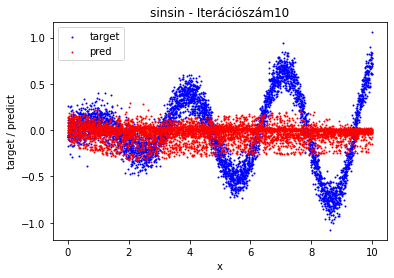

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


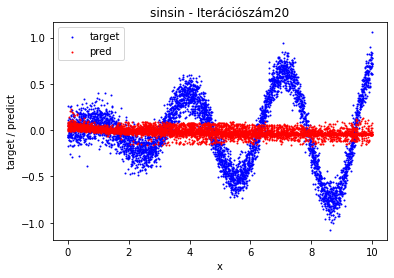

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


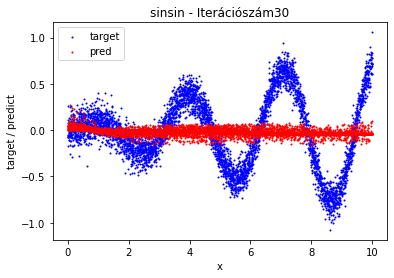

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


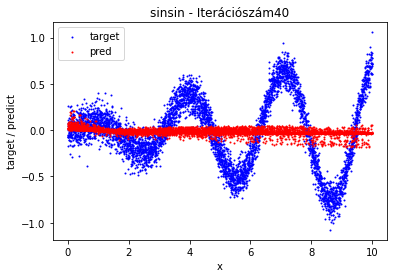

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


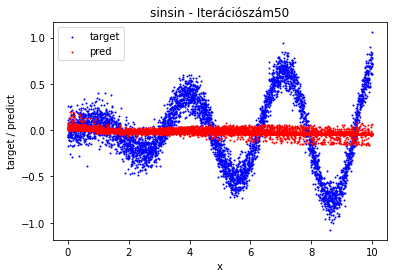

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


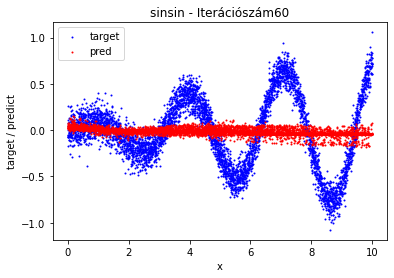

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


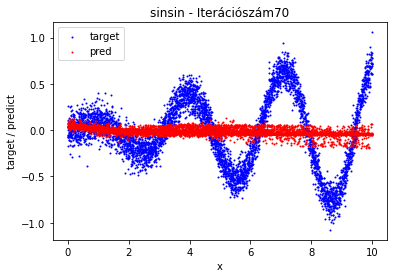

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


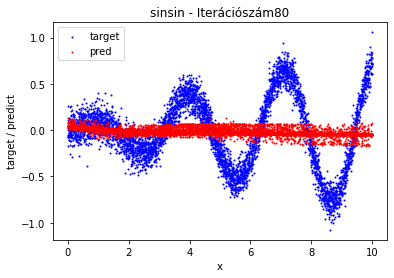

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


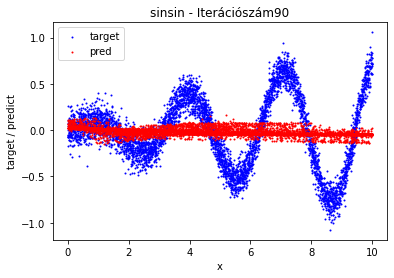

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


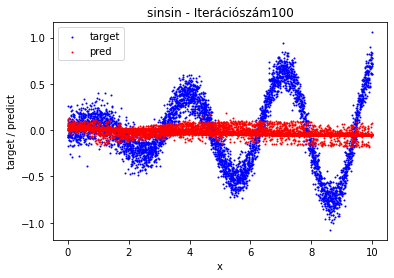

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


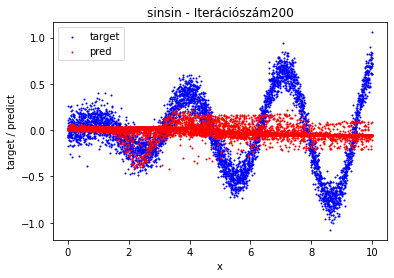

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


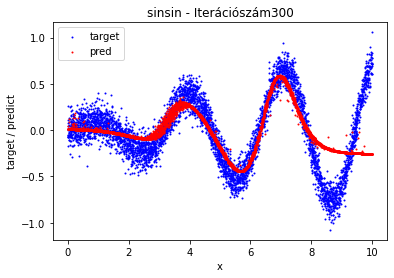

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


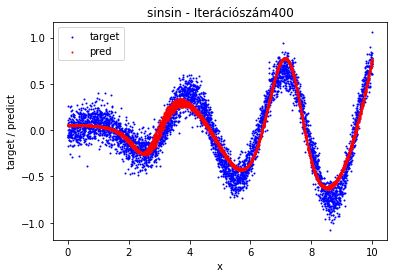

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


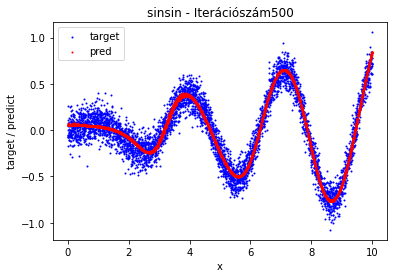

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


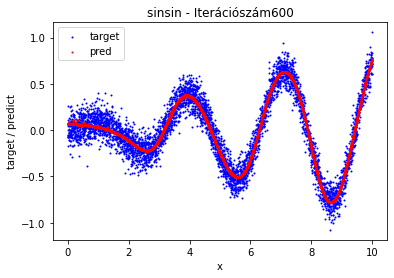

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


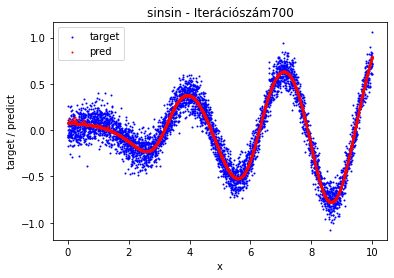

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


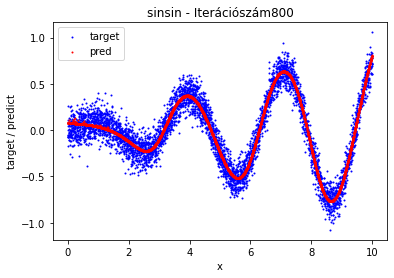

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


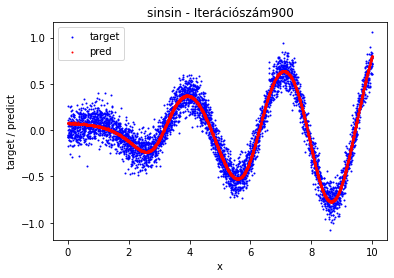

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


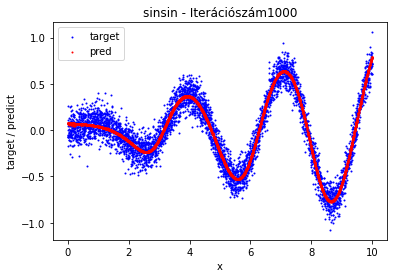

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


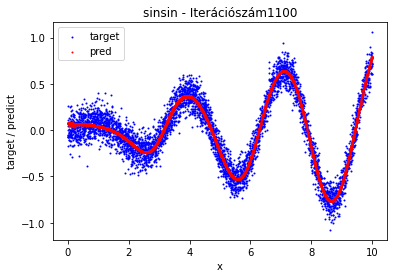

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


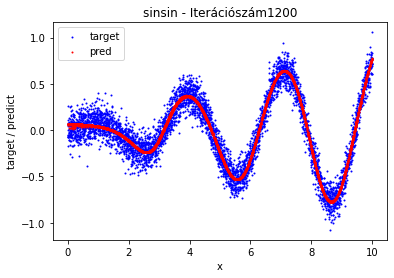

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


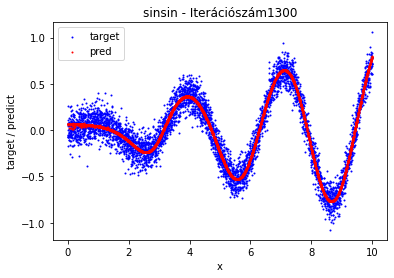

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


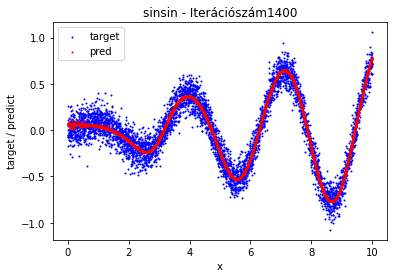

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


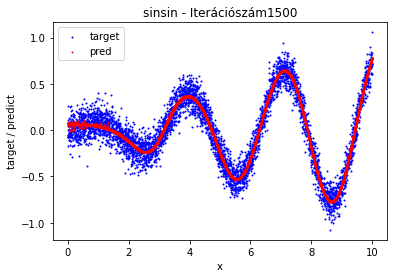

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


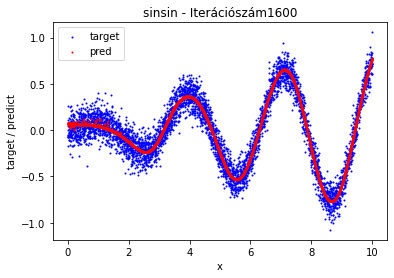

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


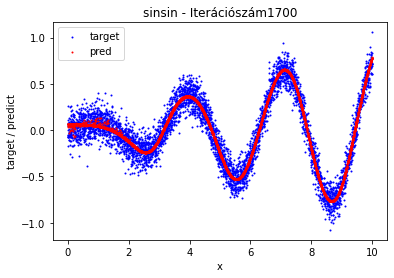

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


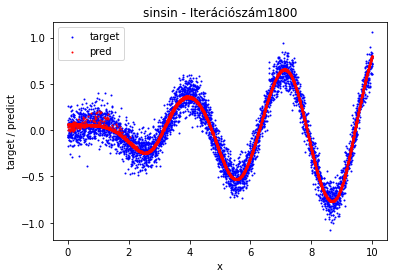

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


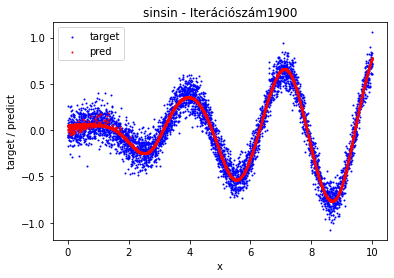

/Users/gasparpapanekcsaba/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


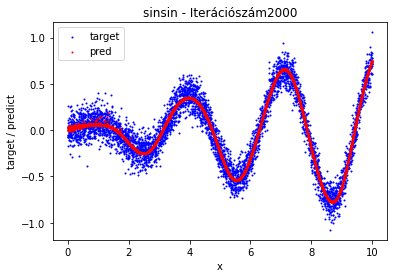

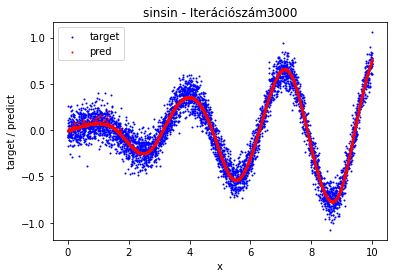

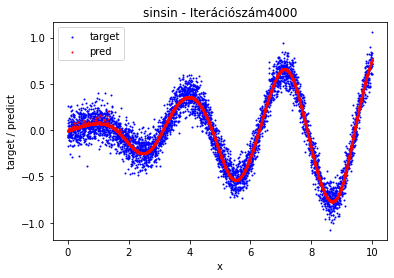

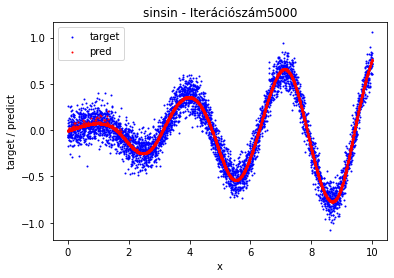

In [16]:
df=dataset_collection["sinsin"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()



for iteraciok_szama in [1]+list(range(10,101,10))+list(range(200,2001,100))+[3000,4000,5000]:
    model=model_collection["ann-7-5optim"]
    model.set_params(**({"max_iter":iteraciok_szama}))
    model.fit(train_df[train_df.columns[:-1]],train_df['target'])
    test_df['pred']=model.predict(test_df[train_df.columns[:-1]])
    egydimenziosat_rajzol(test_df,k+" - Iterációszám"+str(iteraciok_szama))
    plt.show()
